# Predicting Term Deposit Subscription by a client

### Abstract
Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign. A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening a deposit account) in which your money will be returned back at a specific maturity time. 
### Problem Statement
Predict if a customer subscribes to a term deposits or not, when contacted by a marketing agent, by understanding the different features and performing predictive analytics

* __age__ : Age of the client
* __job__ : Type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* __marital__ : Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* __education__ : (categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')
* __default__ : has credit in default? (categorical: 'no','yes','unknown')
* __housing__ : has a housing loan? (categorical: 'no','yes','unknown')
* __loan__ : has a personal loan? (categorical: 'no','yes','unknown')
* __contact__ : contact communication type (categorical: 'cellular','telephone')
* __month__ : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* __day_of_week__ : last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* __duration__ : last contact duration, in seconds
* __campaign__ : number of contacts performed during this campaign and for this client (numeric, includes last contact)
* __pdays__ : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* __previous__ : number of contacts performed before this campaign and for this client
* __poutcome__ : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
* __emp.var.rate__ : employment variation rate - quarterly indicator (numeric) cons.price.idx consumer price index - monthly indicator 
* __cons.conf.idx__ : consumer confidence index - monthly indicator
* __euribor3m__ : euribor 3 month rate - daily indicator nr.employed number of employees - quarterly indicator 
* __y__ : has the client subscribed a term deposit? (binary: 'yes','no')

# Assigning working directory

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

# Importing datasets

In [4]:
df = pd.read_csv('bank-additional-full.csv',
                sep=';')

In [5]:
df_desc = pd.read_csv('desc.csv')
df_desc.index = df_desc['Column']
df_desc.drop('Column', axis=1, inplace=True)
df_desc = df_desc.T

# Basic commands

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df_desc.head()

Column,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Description,Age of the client,"Type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')","Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)","(categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')","has credit in default? (categorical: 'no','yes','unknown')","has a housing loan? (categorical: 'no','yes','unknown')","has a personal loan? (categorical: 'no','yes','unknown')","contact communication type (categorical: 'cellular','telephone')","last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')","last contact day of the week (categorical: 'mon','tue','wed','thu','fri')","last contact duration, in seconds","number of contacts performed during this campaign and for this client (numeric, includes last contact)",number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted),number of contacts performed before this campaign and for this client,"outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')",employment variation rate - quarterly indicator (numeric),consumer price index - monthly indicator,consumer confidence index - monthly indicator,euribor 3 month rate - daily indicator,number of employees - quarterly indicator,"has the client subscribed a term deposit? (binary: 'yes','no')"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df.shape

(41188, 21)

# Exploratory Data Analysis (EDA)

In [12]:
action = {}

In [13]:
p_value = {}

### Some important functions

In [14]:
def t_test(num, cat, data):
    from scipy.stats import ttest_ind
    
    Ho = f'There is no significant impact of {num} on {cat} (No predictability)'
    Ha = f'There is a significant impact of {num} on {cat} (Good predictor)'
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    un1 = data[cat].unique()[0]
    un2 = data[cat].unique()[1]
    
    ind1 = data[data[cat]==un1]
    ind2 = data[data[cat]==un2]
    
    stat, p = ttest_ind(ind1[num], ind2[num])
    print('Test Statistics: ', stat)
    print('p-value: ', p)
    print('\n')
    
    if p>alpha:
        print('Fail to reject Ho, ', Ho)
    else:
        print('Reject Ho, ', Ha)
        
    return p
    

In [15]:
def chi2(x, y, data):
    from scipy.stats import chi2_contingency
    
    Ho = f'There is no significant assosiation between {x} and {y} (No predictability)'
    Ha = f'There is a significant assosiation between {x} and {y} (Good predictor)'
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    ct = pd.crosstab(data[x], data[y])
    chi2, p, dof, ex = chi2_contingency(ct)
    print('chi-square stats: ', chi2)
    print('p-value: ', p)
    print('\n')

    if p>alpha:
        print('Fail to reject null hypothesis, ', Ho)
    else:
        print('Reject null hypothesis, ', Ha)
        
    return p

In [16]:
def find_proportion(col, df):
    for ind, i in enumerate(df[col].value_counts().index):
        print(f'Proportion of {i}: {round(df[col].value_counts()[ind]/len(df[col]) * 100)}%')

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### y

In [18]:
df_desc['y']

Description    has the client subscribed a term deposit? (binary: 'yes','no')
Name: y, dtype: object

In [19]:
df.y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [20]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

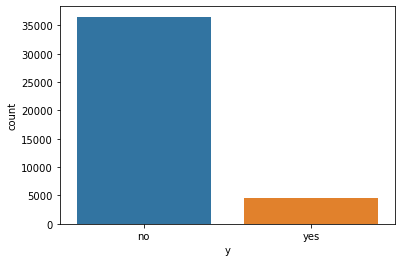

In [21]:
sns.countplot(df.y)

In [22]:
# The response variable is unevenly distributed. we have to fix this at preprocessing phase

In [23]:
find_proportion('y', df)

Proportion of no: 89.0%
Proportion of yes: 11.0%


In [24]:
len(df)

41188

In [25]:
# Out of 41,188 calls made in the Market campign, 36,548 clients rejected the subscription and only 4,650 clients subscribed 
# a term deposit.

In [26]:
df.y.value_counts()[1]/len(df)*100

11.265417111780131

In [27]:
# Hence the success rate of subscription is only 11.26 %.

#### age

In [28]:
df_desc['age']

Description    Age of the client
Name: age, dtype: object

In [29]:
df.age.head()

0    56
1    57
2    37
3    40
4    56
Name: age, dtype: int64

In [30]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [31]:
# The minimum age is 17 and the maximum age is 98.

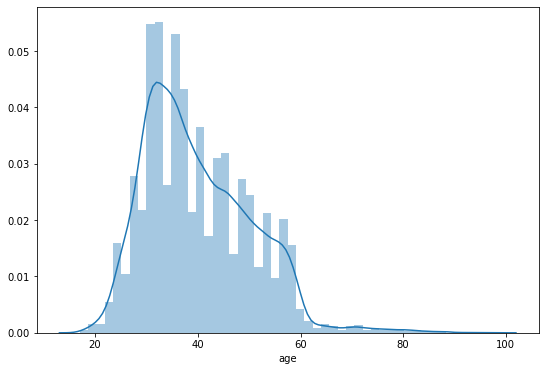

In [32]:
plt.figure(figsize=(9,6))
sns.distplot(df.age)

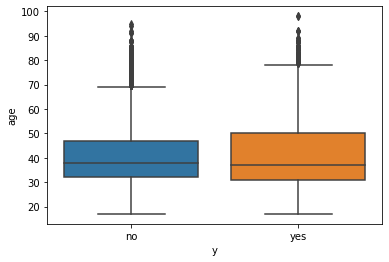

In [33]:
sns.boxplot(df.y, df.age)

In [34]:
p_value['age'] = t_test(num='age', cat='y', data=df)

Ho:  There is no significant impact of age on y (No predictability)
Ha:  There is a significant impact of age on y (Good predictor)


Test Statistics:  -6.172087109640128
p-value:  6.80213641846347e-10


Reject Ho,  There is a significant impact of age on y (Good predictor)


In [35]:
# age can be a good predictor of y

In [36]:
# Lets create a new column by grouping the age

df['age_group'] = pd.cut(df.age,
                        bins=[0, 20, 40, 60, 80, np.inf],
                        labels=['0-20', '20-40', '40-60', '60-80', '>80'])

In [37]:
df['age_group'].value_counts()

20-40    23628
40-60    16510
60-80      791
0-20       140
>80        119
Name: age_group, dtype: int64

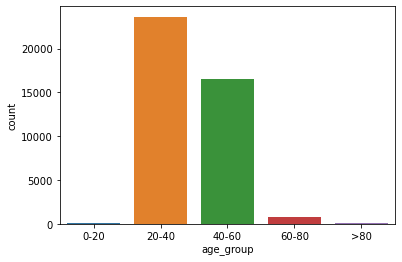

In [38]:
sns.countplot(df.age_group)

In [39]:
pd.crosstab(df.age_group, df.y, normalize=True, margins=True) * 100

y,no,yes,All
age_group,,,
0-20,0.201515,0.138390,0.339905
20-40,50.898320,6.467903,57.366223
40-60,36.430514,3.653977,40.084491
60-80,1.058561,0.861902,1.920462
>80,0.145673,0.143246,0.288919
All,88.734583,11.265417,100.000000


In [40]:
# Of the total population, 6.4% of clients within age 20 to 40 have accepted to subscribe to the term deposit.
# And 50.8% of clients within the same age group have rejected the subscription.

In [41]:
# Out of 0.33% calls made to clients who are 0-20 years of age, 0.13% of them subscribed term deposit.
# Out of 57.36% calls made to clients who are 20-40 years of age, 6.46% of them subscribed term deposit.
# Out of 40.08% calls made to clients who are 40-60 years of age, 3.65% of them subscribed term deposit.
# Out of 1.92% calls made to clients who are 60-80 years of age, 0.86% of them subscribed term deposit.
# Out of 0.28% calls made to clients who are greater than 80 years of age, 0.14% of them subscribed term deposit.

In [42]:
pd.crosstab(df.age_group, df.y, normalize='columns')['yes'] * 100

age_group
0-20      1.228448
20-40    57.413793
40-60    32.435345
60-80     7.650862
>80       1.271552
Name: yes, dtype: float64

In [43]:
# Of those who subscibed to term deposit, 57.4% were between age 20 to 40.

In [44]:
ct_age = pd.crosstab(df.age_group, df.y, margins=True)
ct_age

y,no,yes,All
age_group,,,
0-20,83,57,140
20-40,20964,2664,23628
40-60,15005,1505,16510
60-80,436,355,791
>80,60,59,119
All,36548,4640,41188


In [45]:
ct_age['yes']/ct_age['All'] * 100

age_group
0-20     40.714286
20-40    11.274759
40-60     9.115687
60-80    44.879899
>80      49.579832
All      11.265417
dtype: float64

In [46]:
# The highest success rate is with clients who are above 80 years of age.
# Out of 199 calls, 59 clients subscribed to the term deposit

In [47]:
# The lowest success rate is with clients who are between 20 to 40 years of age
# Out of 23,628 calls, only 2,664 clients subscribed to the term deposit

In [48]:
action['drop'] = [('age_group', 'finished analysis')]

#### job

In [49]:
df_desc['job']

Description    Type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
Name: job, dtype: object

In [50]:
df.job.head()

0    housemaid
1     services
2     services
3       admin.
4     services
Name: job, dtype: object

In [51]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

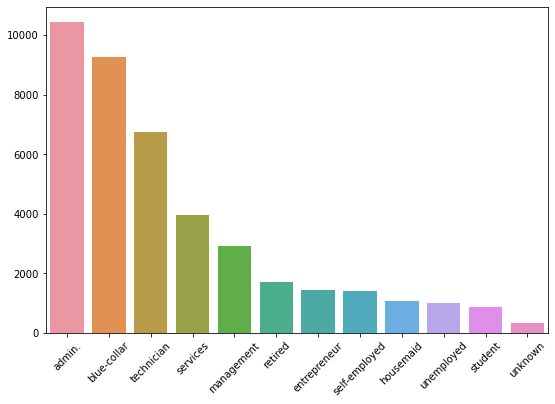

In [52]:
plt.figure(figsize=(9,6))
sns.barplot(df.job.value_counts().index, df.job.value_counts().values)
plt.xticks(rotation=45)

In [53]:
ct_job = pd.crosstab(df.job, df.y, margins=True)
ct_job

y,no,yes,All
job,,,
admin.,9070,1352,10422
blue-collar,8616,638,9254
entrepreneur,1332,124,1456
housemaid,954,106,1060
management,2596,328,2924
retired,1286,434,1720
self-employed,1272,149,1421
services,3646,323,3969
student,600,275,875


In [54]:
ct_job['yes']/ct_job['All'] * 100

job
admin.           12.972558
blue-collar       6.894316
entrepreneur      8.516484
housemaid        10.000000
management       11.217510
retired          25.232558
self-employed    10.485574
services          8.138070
student          31.428571
technician       10.826042
unemployed       14.201183
unknown          11.212121
All              11.265417
dtype: float64

In [55]:
# Of the 10,422 call to admin, 1352 of them subscribed.

# The highest success rate was with students, Of the 875 calls made to students, 275 of them subscribed to term deposit.

In [56]:
ct_job = pd.crosstab(df.job, df.y, normalize=True, margins=True) * 100
ct_job

y,no,yes,All
job,,,
admin.,22.020977,3.282509,25.303486
blue-collar,20.918714,1.548995,22.467709
entrepreneur,3.233952,0.301059,3.535010
housemaid,2.316209,0.257357,2.573565
management,6.302807,0.796348,7.099155
retired,3.122269,1.053705,4.175974
self-employed,3.088278,0.361756,3.450034
services,8.852093,0.784209,9.636302
student,1.456735,0.667670,2.124405


In [57]:
# Of the total population 3.2% of admin subscribed to term deposit, and 22.02% of admin rejected the subscription

In [58]:
for ind, level in enumerate(ct_job.index[:-1]):
    print(f'Out of {round(ct_job.iloc[ind][2],2)}% calls made to clients who are {level}, {round(ct_job.iloc[ind][1],2)}% of them subscribed term deposit')
    print('\n')

Out of 25.3% calls made to clients who are admin., 3.28% of them subscribed term deposit


Out of 22.47% calls made to clients who are blue-collar, 1.55% of them subscribed term deposit


Out of 3.54% calls made to clients who are entrepreneur, 0.3% of them subscribed term deposit


Out of 2.57% calls made to clients who are housemaid, 0.26% of them subscribed term deposit


Out of 7.1% calls made to clients who are management, 0.8% of them subscribed term deposit


Out of 4.18% calls made to clients who are retired, 1.05% of them subscribed term deposit


Out of 3.45% calls made to clients who are self-employed, 0.36% of them subscribed term deposit


Out of 9.64% calls made to clients who are services, 0.78% of them subscribed term deposit


Out of 2.12% calls made to clients who are student, 0.67% of them subscribed term deposit


Out of 16.37% calls made to clients who are technician, 1.77% of them subscribed term deposit


Out of 2.46% calls made to clients who are unemployed, 0.3

In [59]:
# Lets club some levels together

df = df.replace({'job': {
    'retired' : 'other',
    'housemaid' : 'other',
    'unemployed' : 'other',
    'student' : 'other',
    'unknown' : 'other',
    'entrepreneur' : 'self-employed'
}})

In [60]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
other             4999
services          3969
management        2924
self-employed     2877
Name: job, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

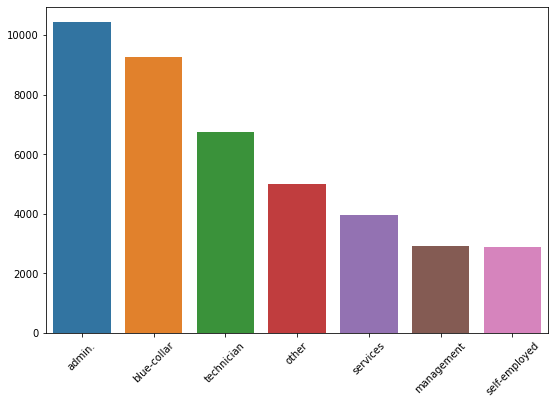

In [61]:
plt.figure(figsize=(9,6))
sns.barplot(df.job.value_counts().index, df.job.value_counts().values)
plt.xticks(rotation=45)

In [62]:
p_value['job'] = chi2('job', 'y', df)

Ho:  There is no significant assosiation between job and y (No predictability)
Ha:  There is a significant assosiation between job and y (Good predictor)


chi-square stats:  631.4009997360857
p-value:  3.920006662976762e-133


Reject null hypothesis,  There is a significant assosiation between job and y (Good predictor)


In [63]:
# job can be a good predictor of y

#### marital

In [64]:
df_desc['marital']

Description    Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
Name: marital, dtype: object

In [65]:
df.marital.head()

0    married
1    married
2    married
3    married
4    married
Name: marital, dtype: object

In [66]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

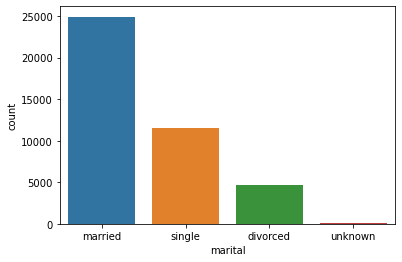

In [67]:
sns.countplot(df.marital)

In [68]:
ct_mar = pd.crosstab(df.marital, df.y, normalize=True, margins=True) * 100
ct_mar

y,no,yes,All
marital,,,
divorced,10.041760,1.155676,11.197436
married,54.375061,6.147422,60.522482
single,24.152666,3.933184,28.085850
unknown,0.165097,0.029135,0.194231
All,88.734583,11.265417,100.000000


In [69]:
for ind, level in enumerate(ct_mar.index[:-1]):
    print(f'Out of {round(ct_mar.iloc[ind][2],2)}% calls made to clients who are {level}, {round(ct_mar.iloc[ind][1],2)}% of them subscribed term deposit')
    print('\n')

Out of 11.2% calls made to clients who are divorced, 1.16% of them subscribed term deposit


Out of 60.52% calls made to clients who are married, 6.15% of them subscribed term deposit


Out of 28.09% calls made to clients who are single, 3.93% of them subscribed term deposit


Out of 0.19% calls made to clients who are unknown, 0.03% of them subscribed term deposit




In [70]:
# Lets club some values together

df = df.replace({'marital': {
    'divorced' : 'single',
    'unknown' : 'single'
}})

In [71]:
df.marital.value_counts()

married    24928
single     16260
Name: marital, dtype: int64

In [72]:
pd.crosstab(df.marital, df.y, normalize=True, margins=True) * 100

y,no,yes,All
marital,,,
married,54.375061,6.147422,60.522482
single,34.359522,5.117996,39.477518
All,88.734583,11.265417,100.000000


In [73]:
# of the total people in this marketing campign, 6.14% of married people subscribed and 5.11% of unmarried people subscribed.

In [74]:
ct_mar = pd.crosstab(df.marital, df.y, margins=True)
ct_mar

y,no,yes,All
marital,,,
married,22396,2532,24928
single,14152,2108,16260
All,36548,4640,41188


In [75]:
ct_mar['yes']/ct_mar['All'] * 100

marital
married    10.157253
single     12.964330
All        11.265417
dtype: float64

In [76]:
# Success rate of both married and single people are almost the same.

In [77]:
chi2('marital', 'y', df)

Ho:  There is no significant assosiation between marital and y (No predictability)
Ha:  There is a significant assosiation between marital and y (Good predictor)


chi-square stats:  77.29156308478301
p-value:  1.4749474147480335e-18


Reject null hypothesis,  There is a significant assosiation between marital and y (Good predictor)


1.4749474147480335e-18

In [78]:
# marital can be a good predictor of y

#### education

In [79]:
df_desc['education']

Description    (categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')
Name: education, dtype: object

In [80]:
df.education.head()

0       basic.4y
1    high.school
2    high.school
3       basic.6y
4    high.school
Name: education, dtype: object

In [81]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

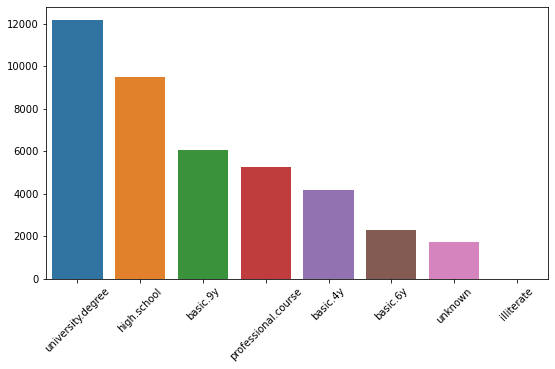

In [82]:
plt.figure(figsize=(9,5))
sns.barplot(df.education.value_counts().index, df.education.value_counts().values)
plt.xticks(rotation=45)

In [83]:
ct_edu = pd.crosstab(df.education, df.y, margins=True)
ct_edu

y,no,yes,All
education,,,
basic.4y,3748,428,4176
basic.6y,2104,188,2292
basic.9y,5572,473,6045
high.school,8484,1031,9515
illiterate,14,4,18
professional.course,4648,595,5243
university.degree,10498,1670,12168
unknown,1480,251,1731
All,36548,4640,41188


In [84]:
ct_edu = pd.crosstab(df.education, df.y, normalize=True, margins=True) * 100
ct_edu

y,no,yes,All
education,,,
basic.4y,9.099738,1.039138,10.138875
basic.6y,5.108284,0.456444,5.564728
basic.9y,13.528212,1.148393,14.676605
high.school,20.598232,2.503156,23.101389
illiterate,0.033990,0.009712,0.043702
professional.course,11.284840,1.444596,12.729436
university.degree,25.488006,4.054579,29.542585
unknown,3.593280,0.609401,4.202680
All,88.734583,11.265417,100.000000


In [85]:
for ind, level in enumerate(ct_edu.index[:-1]):
    print(f'Out of {round(ct_edu.iloc[ind][2],2)}% calls made to clients whose qualification is {level}, {round(ct_edu.iloc[ind][1],2)}% of them subscribed term deposit')
    print('\n')

Out of 10.14% calls made to clients whose qualification is basic.4y, 1.04% of them subscribed term deposit


Out of 5.56% calls made to clients whose qualification is basic.6y, 0.46% of them subscribed term deposit


Out of 14.68% calls made to clients whose qualification is basic.9y, 1.15% of them subscribed term deposit


Out of 23.1% calls made to clients whose qualification is high.school, 2.5% of them subscribed term deposit


Out of 0.04% calls made to clients whose qualification is illiterate, 0.01% of them subscribed term deposit


Out of 12.73% calls made to clients whose qualification is professional.course, 1.44% of them subscribed term deposit


Out of 29.54% calls made to clients whose qualification is university.degree, 4.05% of them subscribed term deposit


Out of 4.2% calls made to clients whose qualification is unknown, 0.61% of them subscribed term deposit




In [86]:
pd.crosstab(df.education, df.y, normalize='columns') * 100

y,no,yes
education,,
basic.4y,10.255007,9.224138
basic.6y,5.756813,4.051724
basic.9y,15.245704,10.193966
high.school,23.213309,22.219828
illiterate,0.038306,0.086207
professional.course,12.717522,12.823276
university.degree,28.723870,35.991379
unknown,4.049469,5.409483


In [87]:
(ct_edu['yes']/ct_edu['All'] * 100)

education
basic.4y               10.249042
basic.6y                8.202443
basic.9y                7.824648
high.school            10.835523
illiterate             22.222222
professional.course    11.348465
university.degree      13.724523
unknown                14.500289
All                    11.265417
dtype: float64

In [88]:
# Lets club some levels together

df = df.replace({'education': {
    'basic.4y': 'basic',
    'basic.6y': 'basic',
    'basic.9y': 'basic',
    'illiterate': 'other',
    'unknown': 'other'
}})

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

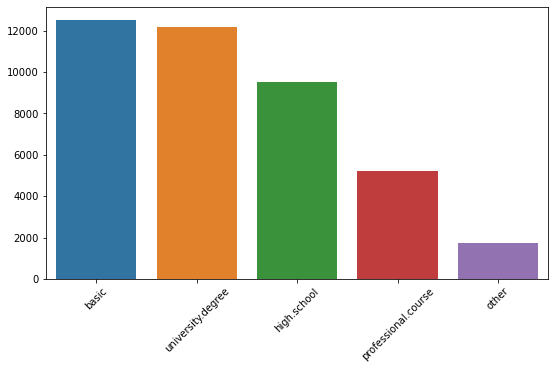

In [89]:
plt.figure(figsize=(9,5))
sns.barplot(df.education.value_counts().index, df.education.value_counts().values)
plt.xticks(rotation=45)

In [90]:
chi2('education', 'y', df)

Ho:  There is no significant assosiation between education and y (No predictability)
Ha:  There is a significant assosiation between education and y (Good predictor)


chi-square stats:  176.81797817305903
p-value:  3.5962102420851655e-37


Reject null hypothesis,  There is a significant assosiation between education and y (Good predictor)


3.5962102420851655e-37

In [91]:
# education is a good predictor of y

#### default

In [92]:
df_desc['default']

Description    has credit in default? (categorical: 'no','yes','unknown')
Name: default, dtype: object

In [93]:
df.default.head()

0         no
1    unknown
2         no
3         no
4         no
Name: default, dtype: object

In [94]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

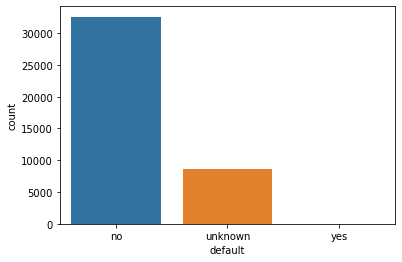

In [95]:
sns.countplot(df.default)

In [96]:
# Most of the values are 'no'.

In [97]:
p_value['default'] = chi2('default', 'y', df)

Ho:  There is no significant assosiation between default and y (No predictability)
Ha:  There is a significant assosiation between default and y (Good predictor)


chi-square stats:  406.5775146420093
p-value:  5.1619579513916376e-89


Reject null hypothesis,  There is a significant assosiation between default and y (Good predictor)


In [98]:
# default variable is significant, but lets look at the proportions.

In [99]:
pd.crosstab(df.default, df.y, margins=True)

y,no,yes,All
default,,,
no,28391,4197,32588
unknown,8154,443,8597
yes,3,0,3
All,36548,4640,41188


In [100]:
ct_def = pd.crosstab(df.default, df.y, normalize=True, margins=True) * 100
ct_def

y,no,yes,All
default,,,
no,68.930271,10.189861,79.120132
unknown,19.797028,1.075556,20.872584
yes,0.007284,0.000000,0.007284
All,88.734583,11.265417,100.000000


In [101]:
# Of the total population 10.18% of those who said 'yes' are non-defaulters and 1.07% of those who said 'yes' are
# defaulters who said unknown.

In [102]:
for ind, level in enumerate(ct_def.index[:-1]):
    print(f'Out of {round(ct_def.iloc[ind][2],2)}% calls made to clients who has credit in default is {level}, {round(ct_def.iloc[ind][1],2)}% of them subscribed term deposit')
    print('\n')

Out of 79.12% calls made to clients who has credit in default is no, 10.19% of them subscribed term deposit


Out of 20.87% calls made to clients who has credit in default is unknown, 1.08% of them subscribed term deposit


Out of 0.01% calls made to clients who has credit in default is yes, 0.0% of them subscribed term deposit




In [103]:
pd.crosstab(df.default, df.y, normalize='columns') * 100

y,no,yes
default,,
no,77.681405,90.452586
unknown,22.310386,9.547414
yes,0.008208,0.000000


In [104]:
# Most of the people who said 'yes' for subscribing term deposit are non-defaulters.

# There is no use of this variable because the proportion is uneven. 

In [105]:
action['drop'].append(('default', 'proportion'))

#### housing

In [106]:
df_desc['housing']

Description    has a housing loan? (categorical: 'no','yes','unknown')
Name: housing, dtype: object

In [107]:
df.housing.head()

0     no
1     no
2    yes
3     no
4     no
Name: housing, dtype: object

In [108]:
df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

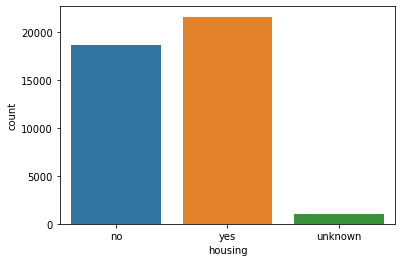

In [109]:
sns.countplot(df.housing)

In [110]:
# Lets assume those who said unknown don't have housing loan.

df = df.replace({'housing': {
    'unknown': 'no'
}})

In [111]:
df.housing.value_counts()

yes    21576
no     19612
Name: housing, dtype: int64

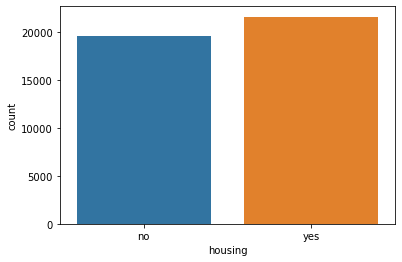

In [112]:
sns.countplot(df.housing)

In [113]:
pd.crosstab(df.housing, df.y, margins=True)

y,no,yes,All
housing,,,
no,17479,2133,19612
yes,19069,2507,21576
All,36548,4640,41188


In [114]:
pd.crosstab(df.housing, df.y, normalize=True, margins=True) * 100

y,no,yes,All
housing,,,
no,42.437118,5.178693,47.61581
yes,46.297465,6.086724,52.38419
All,88.734583,11.265417,100.00000


In [115]:
# Of the total population 5.17% of the clients who dont have housing loan said 'yes' to the term deposit and
# 6.08% of those who have housing loan said 'yes' to term deposit.

In [116]:
# 47.61% of the calls were made to clients who don't have housing loan, of that, only 5.17% of them accepted term deposit.
# 52.38% of the calls were made to clients who have housing loan, of that, only 6.08% of them accepted term deposit.

In [117]:
pd.crosstab(df.housing, df.y, normalize='columns') * 100

y,no,yes
housing,,
no,47.824778,45.969828
yes,52.175222,54.030172


In [118]:
p_value['housing'] = chi2('housing', 'y', df)

Ho:  There is no significant assosiation between housing and y (No predictability)
Ha:  There is a significant assosiation between housing and y (Good predictor)


chi-square stats:  5.605561531083705
p-value:  0.01790355627479152


Reject null hypothesis,  There is a significant assosiation between housing and y (Good predictor)


In [119]:
# The p-value of chi2 test between housing and y is 0.017, which is very close to 0.05. So we can drop this column.

action['drop'].append(('housing', 'p-value close to 0.05'))

#### loan

In [120]:
df_desc['loan']

Description    has a personal loan? (categorical: 'no','yes','unknown')
Name: loan, dtype: object

In [121]:
df.loan.head()

0     no
1     no
2     no
3     no
4    yes
Name: loan, dtype: object

In [122]:
df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

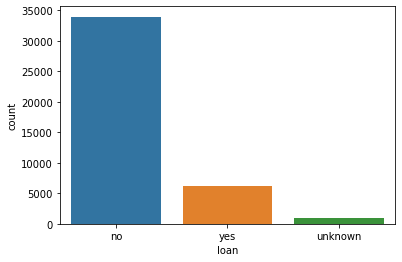

In [123]:
sns.countplot(df.loan)

In [124]:
ct_loan = pd.crosstab(df.loan, df.y, normalize=True, margins=True) * 100
ct_loan

y,no,yes,All
loan,,,
no,73.079538,9.347383,82.426920
unknown,2.143828,0.259784,2.403613
yes,13.511217,1.658250,15.169467
All,88.734583,11.265417,100.000000


In [125]:
for ind, level in enumerate(ct_loan.index[:-1]):
    print(f'Out of {round(ct_loan.iloc[ind][2],2)}% calls made to clients who are {level}, {round(ct_loan.iloc[ind][1],2)}% of them subscribed term deposit')
    print('\n')

Out of 82.43% calls made to clients who are no, 9.35% of them subscribed term deposit


Out of 2.4% calls made to clients who are unknown, 0.26% of them subscribed term deposit


Out of 15.17% calls made to clients who are yes, 1.66% of them subscribed term deposit




In [126]:
# Of the total population, 9.34 of the clients who don't have a housing loan subscribed to term deposit

In [127]:
df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [128]:
round(df.loan.value_counts()[0]/len(df.loan) * 100)

82.0

In [129]:
find_proportion('loan', df)

Proportion of no: 82.0%
Proportion of yes: 15.0%
Proportion of unknown: 2.0%


In [130]:
# Because of uneven proportion we cannot use this variable

action['drop'].append(('loan', 'uneven proportion and p-value'))

In [131]:
# Assosiation between loan and y using chi2 test

p_value['loan'] = chi2('loan', 'y', df)

Ho:  There is no significant assosiation between loan and y (No predictability)
Ha:  There is a significant assosiation between loan and y (Good predictor)


chi-square stats:  1.094027551150338
p-value:  0.5786752870441754


Fail to reject null hypothesis,  There is no significant assosiation between loan and y (No predictability)


In [132]:
# There is no predictability for loan variable

#### contact

In [133]:
df_desc['contact']

Description    contact communication type (categorical: 'cellular','telephone')
Name: contact, dtype: object

In [134]:
df.contact.head()

0    telephone
1    telephone
2    telephone
3    telephone
4    telephone
Name: contact, dtype: object

In [135]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

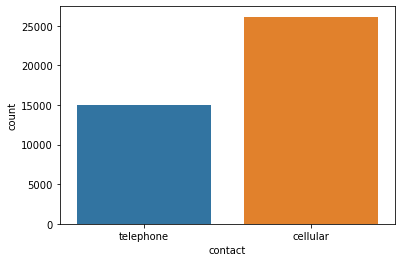

In [136]:
sns.countplot(df.contact)

In [137]:
find_proportion('contact', df)

Proportion of cellular: 63.0%
Proportion of telephone: 37.0%


In [138]:
pd.crosstab(df.contact, df.y, margins=True)

y,no,yes,All
contact,,,
cellular,22291,3853,26144
telephone,14257,787,15044
All,36548,4640,41188


In [139]:
ct_con = pd.crosstab(df.contact, df.y, normalize=True, margins=True) * 100
ct_con

y,no,yes,All
contact,,,
cellular,54.120132,9.354666,63.474798
telephone,34.614451,1.910751,36.525202
All,88.734583,11.265417,100.000000


In [140]:
for ind, level in enumerate(ct_con.index[:-1]):
    print(f'Out of {round(ct_con.iloc[ind][2],2)}% calls made through {level}, {round(ct_con.iloc[ind][1],2)}% of them subscribed term deposit')
    print('\n')

Out of 63.47% calls made through cellular, 9.35% of them subscribed term deposit


Out of 36.53% calls made through telephone, 1.91% of them subscribed term deposit




In [141]:
# Assosication between contact and y using chi2

chi2('contact', 'y', df)

Ho:  There is no significant assosiation between contact and y (No predictability)
Ha:  There is a significant assosiation between contact and y (Good predictor)


chi-square stats:  862.3183642075705
p-value:  1.5259856523129964e-189


Reject null hypothesis,  There is a significant assosiation between contact and y (Good predictor)


1.5259856523129964e-189

In [142]:
# contact can be a good predictor

#### month

In [143]:
df_desc['month']

Description    last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
Name: month, dtype: object

In [144]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

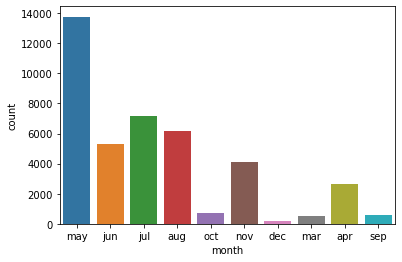

In [145]:
sns.countplot(df.month)

In [146]:
pd.crosstab(df.month, df.y, margins=True)

y,no,yes,All
month,,,
apr,2093,539,2632
aug,5523,655,6178
dec,93,89,182
jul,6525,649,7174
jun,4759,559,5318
mar,270,276,546
may,12883,886,13769
nov,3685,416,4101
oct,403,315,718


In [147]:
pd.crosstab(df.month, df.y, normalize='columns', margins=True) * 100

y,no,yes,All
month,,,
apr,5.726716,11.616379,6.390211
aug,15.111634,14.116379,14.999514
dec,0.254460,1.918103,0.441876
jul,17.853234,13.987069,17.417694
jun,13.021232,12.047414,12.911528
mar,0.738755,5.948276,1.325629
may,35.249535,19.094828,33.429640
nov,10.082631,8.965517,9.956784
oct,1.102660,6.788793,1.743226


In [148]:
# 33.42% of calls were made in may and 19.09% of them accepted the term deposit subscription.

In [149]:
ct_mon = pd.crosstab(df.month, df.y, normalize=True, margins=True) * 100
ct_mon

y,no,yes,All
month,,,
apr,5.081577,1.308634,6.390211
aug,13.409245,1.590269,14.999514
dec,0.225794,0.216082,0.441876
jul,15.841993,1.575702,17.417694
jun,11.554336,1.357191,12.911528
mar,0.655531,0.670098,1.325629
may,31.278528,2.151112,33.429640
nov,8.946781,1.010003,9.956784
oct,0.978440,0.764786,1.743226


In [150]:
for ind, level in enumerate(ct_mon.index[:-1]):
    print(f'Out of {round(ct_mon.iloc[ind][2],2)}% calls last made on {level}, {round(ct_mon.iloc[ind][1],2)}% of them subscribed term deposit')
    print('\n')

Out of 6.39% calls last made on apr, 1.31% of them subscribed term deposit


Out of 15.0% calls last made on aug, 1.59% of them subscribed term deposit


Out of 0.44% calls last made on dec, 0.22% of them subscribed term deposit


Out of 17.42% calls last made on jul, 1.58% of them subscribed term deposit


Out of 12.91% calls last made on jun, 1.36% of them subscribed term deposit


Out of 1.33% calls last made on mar, 0.67% of them subscribed term deposit


Out of 33.43% calls last made on may, 2.15% of them subscribed term deposit


Out of 9.96% calls last made on nov, 1.01% of them subscribed term deposit


Out of 1.74% calls last made on oct, 0.76% of them subscribed term deposit


Out of 1.38% calls last made on sep, 0.62% of them subscribed term deposit




In [151]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [152]:
# Lets club the levels

df = df.replace({'month': {
    'mar' : 'Q2',
    'apr' : 'Q2',
    'may' : 'Q2',
    'jun' : 'Q2',
    'jul' : 'Q3',
    'aug' : 'Q3',
    'sep' : 'Q3',
    'oct' : 'Q4',
    'nov' : 'Q4',
    'dec' : 'Q4'
}})

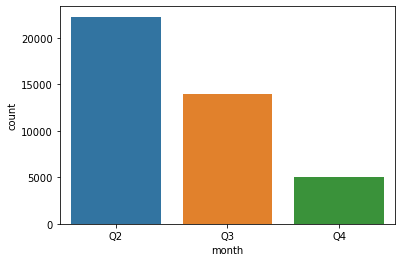

In [153]:
sns.countplot(df.month)

In [154]:
p_value['month'] = chi2('month', 'y', df)

Ho:  There is no significant assosiation between month and y (No predictability)
Ha:  There is a significant assosiation between month and y (Good predictor)


chi-square stats:  159.46497422926657
p-value:  2.358418200186019e-35


Reject null hypothesis,  There is a significant assosiation between month and y (Good predictor)


In [155]:
# month can be a good predictor

#### day_of_week

In [156]:
df_desc['day_of_week']

Description    last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
Name: day_of_week, dtype: object

In [157]:
df.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

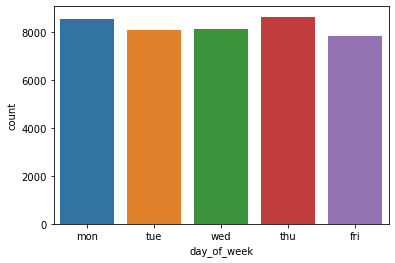

In [158]:
sns.countplot(df.day_of_week)

In [159]:
pd.crosstab(df.day_of_week, df.y, margins=True)

y,no,yes,All
day_of_week,,,
fri,6981,846,7827
mon,7667,847,8514
thu,7578,1045,8623
tue,7137,953,8090
wed,7185,949,8134
All,36548,4640,41188


In [160]:
ct_day = pd.crosstab(df.day_of_week, df.y, normalize=True, margins=True) * 100
ct_day

y,no,yes,All
day_of_week,,,
fri,16.949111,2.053996,19.003108
mon,18.614645,2.056424,20.671069
thu,18.398563,2.537147,20.935709
tue,17.327862,2.313781,19.641643
wed,17.444401,2.304069,19.748470
All,88.734583,11.265417,100.000000


In [161]:
for ind, level in enumerate(ct_day.index[:-1]):
    print(f'Out of {round(ct_day.iloc[ind][2],2)}% calls last made on {level}, {round(ct_day.iloc[ind][1],2)}% of them subscribed term deposit')
    print('\n')

Out of 19.0% calls last made on fri, 2.05% of them subscribed term deposit


Out of 20.67% calls last made on mon, 2.06% of them subscribed term deposit


Out of 20.94% calls last made on thu, 2.54% of them subscribed term deposit


Out of 19.64% calls last made on tue, 2.31% of them subscribed term deposit


Out of 19.75% calls last made on wed, 2.3% of them subscribed term deposit




In [162]:
p_value['day_of_week'] = chi2('day_of_week', 'y', df)

Ho:  There is no significant assosiation between day_of_week and y (No predictability)
Ha:  There is a significant assosiation between day_of_week and y (Good predictor)


chi-square stats:  26.14493907587197
p-value:  2.9584820052785324e-05


Reject null hypothesis,  There is a significant assosiation between day_of_week and y (Good predictor)


In [163]:
# day_of_week can be a good predictor

#### duration

In [164]:
df_desc['duration']

Description    last contact duration, in seconds
Name: duration, dtype: object

In [165]:
df.duration.head()

0    261
1    149
2    226
3    151
4    307
Name: duration, dtype: int64

In [166]:
df.duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [167]:
# The min duration of the call is 0 seconds and the maximum duration of the call is 4918 seconds (82 minutes).
# The average cal duration is 258.28 seconds.

In [168]:
# Lets check the client who talked for 82 minutes.

df.iloc[df.duration.argmax()]

age                                33
job                        technician
marital                        single
education         professional.course
default                            no
housing                           yes
loan                               no
contact                     telephone
month                              Q4
day_of_week                       mon
duration                         4918
campaign                            1
pdays                             999
previous                            0
poutcome                  nonexistent
emp.var.rate                     -0.1
cons.price.idx                   93.2
cons.conf.idx                     -42
euribor3m                       4.406
nr.employed                    5195.8
y                                  no
age_group                       20-40
Name: 24091, dtype: object

In [169]:
# Interestingly, the client who talked for 82 minutes has not subscribed to the term deposit.

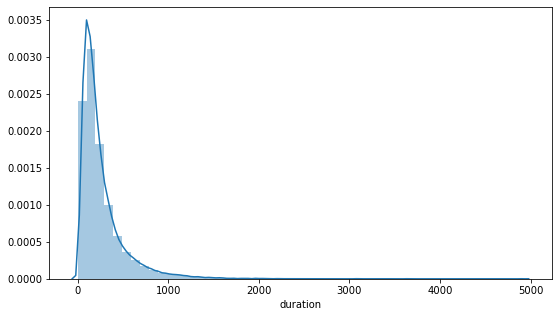

In [170]:
# Histogram
plt.figure(figsize=(9,5))
sns.distplot(df.duration)

In [171]:
# A long tail can be observed in the duration data.
# we will take care of this at the outlier removal phase of the process.

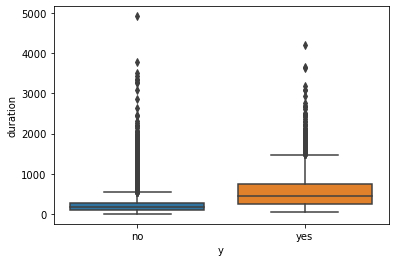

In [172]:
# Boxplot

sns.boxplot(df.y, df.duration)

In [173]:
df.groupby('y').mean()['duration']

y
no     220.844807
yes    553.191164
Name: duration, dtype: float64

In [174]:
# The average duration of those who subscribed to term deposit is 553.19 seconds and those who didn't subscribe is 220.8 seconds

In [175]:
# independent t-test between duration and y

p_value['duration'] = t_test(num='duration', cat='y', data=df)

Ho:  There is no significant impact of duration on y (No predictability)
Ha:  There is a significant impact of duration on y (Good predictor)


Test Statistics:  -89.9672253349018
p-value:  0.0


Reject Ho,  There is a significant impact of duration on y (Good predictor)


#### campaign

In [176]:
df_desc['campaign']

Description    number of contacts performed during this campaign and for this client (numeric, includes last contact)
Name: campaign, dtype: object

In [177]:
df.campaign.head()

0    1
1    1
2    1
3    1
4    1
Name: campaign, dtype: int64

In [178]:
df.campaign.value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [179]:
# Clubbing values

df = df.replace({'campaign': {
    1: '1call', 2: '2calls',
    3: '3-5calls', 4: '3-5calls', 5: '3-5calls', 6: '6-10calls', 7: '6-10calls',
    8: '6-10calls', 9: '6-10calls', 10: '6-10calls',
    11: '>10calls', 12: '>10calls', 13: '>10calls', 14: '>10calls', 15: '>10calls', 16: '>10calls',
    17: '>10calls', 18: '>10calls', 19: '>10calls', 20: '>10calls',
    21: '>10calls', 22: '>10calls', 23: '>10calls', 24: '>10calls', 25: '>10calls', 26: '>10calls',
    27: '>10calls', 28: '>10calls', 29: '>10calls', 30: '>10calls',
    31: '>10calls', 32: '>10calls', 33: '>10calls', 34: '>10calls', 35: '>10calls', 36: '>10calls',
    37: '>10calls', 38: '>10calls', 39: '>10calls', 40: '>10calls',
    41: '>10calls', 42: '>10calls', 43: '>10calls', 44: '>10calls', 45: '>10calls', 46: '>10calls',
    47: '>10calls', 48: '>10calls', 49: '>10calls', 50: '>10calls',
    51: '>10calls', 52: '>10calls', 53: '>10calls', 54: '>10calls', 55: '>10calls', 56: '>10calls',
    57: '>10calls', 58: '>10calls', 59: '>10calls', 60: '>10calls'
}})

In [180]:
df.campaign.value_counts()

1call        17642
2calls       10570
3-5calls      9591
6-10calls     2516
>10calls       869
Name: campaign, dtype: int64

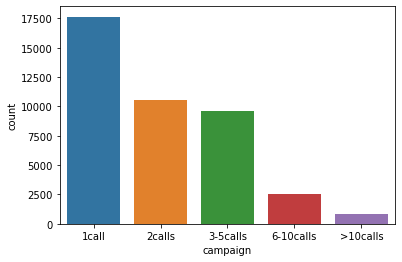

In [181]:
sns.countplot(df.campaign)

In [182]:
pd.crosstab(df.campaign, df.y, margins=True)

y,no,yes,All
campaign,,,
1call,15342,2300,17642
2calls,9359,1211,10570
3-5calls,8648,943,9591
6-10calls,2357,159,2516
>10calls,842,27,869
All,36548,4640,41188


In [183]:
# chi2 test

p_value['campaign'] = chi2('campaign', 'y', df)

Ho:  There is no significant assosiation between campaign and y (No predictability)
Ha:  There is a significant assosiation between campaign and y (Good predictor)


chi-square stats:  194.92164304243207
p-value:  4.640518053840034e-41


Reject null hypothesis,  There is a significant assosiation between campaign and y (Good predictor)


#### pdays

In [184]:
df_desc['pdays']

Description    number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
Name: pdays, dtype: object

In [185]:
df.pdays.head()

0    999
1    999
2    999
3    999
4    999
Name: pdays, dtype: int64

In [186]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [187]:
sorted(df.pdays.unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 25,
 26,
 27,
 999]

In [188]:
df = df.replace({'pdays': {
    0: '0-5days', 1: '0-5days', 2: '0-5days', 3: '0-5days', 4: '0-5days', 5: '0-5days',
    6: '6-10days', 7: '6-10days', 8: '6-10days', 9: '6-10days', 10: '6-10days',
    11: '>10days', 12: '>10days', 13: '>10days', 14: '>10days', 15: '>10days',
    16: '>10days', 17: '>10days', 18: '>10days', 19: '>10days', 20: '>10days',
    21: '>10days', 22: '>10days', 23: '>10days', 24: '>10days', 25: '>10days', 
    26: '>10days', 27: '>10days', 999: 'Nocall'
}})

In [189]:
df.pdays.value_counts()

Nocall      39673
0-5days       705
6-10days      606
>10days       204
Name: pdays, dtype: int64

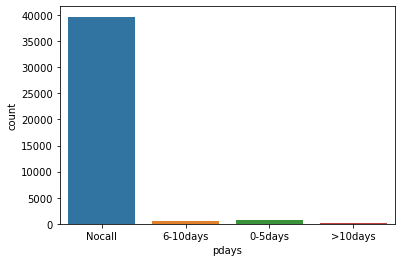

In [190]:
sns.countplot(df.pdays)

In [191]:
p_value['pdays'] = chi2('pdays', 'y', df)

Ho:  There is no significant assosiation between pdays and y (No predictability)
Ha:  There is a significant assosiation between pdays and y (Good predictor)


chi-square stats:  4363.522544125371
p-value:  0.0


Reject null hypothesis,  There is a significant assosiation between pdays and y (Good predictor)


In [192]:
find_proportion('pdays', df)

Proportion of Nocall: 96.0%
Proportion of 0-5days: 2.0%
Proportion of 6-10days: 1.0%
Proportion of >10days: 0.0%


In [193]:
# The proportion is uneven, we can't use this variable in our model.

action['drop'].append(('pdays', 'uneven proportion'))

#### previous

In [194]:
df_desc['previous']

Description    number of contacts performed before this campaign and for this client
Name: previous, dtype: object

In [195]:
df.previous.head()

0    0
1    0
2    0
3    0
4    0
Name: previous, dtype: int64

In [196]:
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

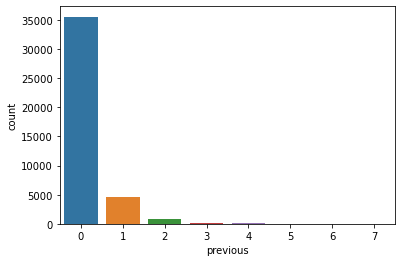

In [197]:
sns.countplot(df.previous)

In [198]:
pd.crosstab(df.previous, df.y, margins=True)

y,no,yes,All
previous,,,
0,32422,3141,35563
1,3594,967,4561
2,404,350,754
3,88,128,216
4,32,38,70
5,5,13,18
6,2,3,5
7,1,0,1
All,36548,4640,41188


In [199]:
ct_pre = pd.crosstab(df.previous, df.y, normalize=True, margins=True) * 100
ct_pre

y,no,yes,All
previous,,,
0,78.717102,7.626008,86.343110
1,8.725842,2.347771,11.073614
2,0.980868,0.849762,1.830630
3,0.213654,0.310770,0.524425
4,0.077693,0.092260,0.169952
5,0.012139,0.031563,0.043702
6,0.004856,0.007284,0.012139
7,0.002428,0.000000,0.002428
All,88.734583,11.265417,100.000000


In [200]:
for ind, level in enumerate(ct_pre.index[:-1]):
    print(f'Out of {round(ct_pre.iloc[ind][2],2)}% clients who were made {level} calls, {round(ct_pre.iloc[ind][1],2)}% of them subscribed term deposit')
    print('\n')

Out of 86.34% clients who were made 0 calls, 7.63% of them subscribed term deposit


Out of 11.07% clients who were made 1 calls, 2.35% of them subscribed term deposit


Out of 1.83% clients who were made 2 calls, 0.85% of them subscribed term deposit


Out of 0.52% clients who were made 3 calls, 0.31% of them subscribed term deposit


Out of 0.17% clients who were made 4 calls, 0.09% of them subscribed term deposit


Out of 0.04% clients who were made 5 calls, 0.03% of them subscribed term deposit


Out of 0.01% clients who were made 6 calls, 0.01% of them subscribed term deposit


Out of 0.0% clients who were made 7 calls, 0.0% of them subscribed term deposit




In [201]:
find_proportion('previous', df)

Proportion of 0: 86.0%
Proportion of 1: 11.0%
Proportion of 2: 2.0%
Proportion of 3: 1.0%
Proportion of 4: 0.0%
Proportion of 5: 0.0%
Proportion of 6: 0.0%
Proportion of 7: 0.0%


In [202]:
# 86% of values are in level 0. 

In [203]:
p_value['previous'] = chi2('previous', 'y', df)

Ho:  There is no significant assosiation between previous and y (No predictability)
Ha:  There is a significant assosiation between previous and y (Good predictor)


chi-square stats:  2299.436359620133
p-value:  0.0


Reject null hypothesis,  There is a significant assosiation between previous and y (Good predictor)


In [204]:
action['drop'].append(('previous', 'uneven proportion'))

In [205]:
df.previous.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [206]:
# Even though we are not using previous variable in our main model, we need to convert this variable to string because 
# we will use this variable in our base model.

df['previous'] = df['previous'].astype('str')

In [207]:
df.previous.unique()

array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype=object)

#### poutcome

In [208]:
df_desc['poutcome']

Description    outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Name: poutcome, dtype: object

In [209]:
df.poutcome.head()

0    nonexistent
1    nonexistent
2    nonexistent
3    nonexistent
4    nonexistent
Name: poutcome, dtype: object

In [210]:
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

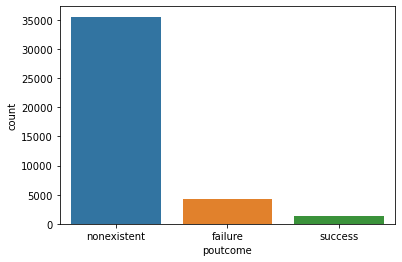

In [211]:
sns.countplot(df.poutcome)

In [212]:
pd.crosstab(df.poutcome, df.y, margins=True)

y,no,yes,All
poutcome,,,
failure,3647,605,4252
nonexistent,32422,3141,35563
success,479,894,1373
All,36548,4640,41188


In [213]:
ct_pout = pd.crosstab(df.poutcome, df.y, normalize=True, margins=True) * 100
ct_pout

y,no,yes,All
poutcome,,,
failure,8.854521,1.468874,10.323395
nonexistent,78.717102,7.626008,86.343110
success,1.162960,2.170535,3.333495
All,88.734583,11.265417,100.000000


In [214]:
for ind, level in enumerate(ct_pout.index[:-1]):
    print(f'Out of {round(ct_pout.iloc[ind][2],2)}% calls which were {level} last campaign, {round(ct_pout.iloc[ind][1],2)}% of them subscribed term deposit')
    print('\n')

Out of 10.32% calls which were failure last campaign, 1.47% of them subscribed term deposit


Out of 86.34% calls which were nonexistent last campaign, 7.63% of them subscribed term deposit


Out of 3.33% calls which were success last campaign, 2.17% of them subscribed term deposit




In [215]:
# chi2 test

p_value['poutcome'] = chi2('poutcome', 'y', df)

Ho:  There is no significant assosiation between poutcome and y (No predictability)
Ha:  There is a significant assosiation between poutcome and y (Good predictor)


chi-square stats:  4230.5237978319765
p-value:  0.0


Reject null hypothesis,  There is a significant assosiation between poutcome and y (Good predictor)


In [216]:
find_proportion('poutcome', df)

Proportion of nonexistent: 86.0%
Proportion of failure: 10.0%
Proportion of success: 3.0%


In [217]:
# 86% of entries are in only one level

action['drop'].append(('poutcome', 'uneven proportion'))

#### emp.var.rate

In [218]:
df_desc['emp.var.rate']

Description    employment variation rate - quarterly indicator (numeric)
Name: emp.var.rate, dtype: object

In [219]:
df['emp.var.rate'].head()

0    1.1
1    1.1
2    1.1
3    1.1
4    1.1
Name: emp.var.rate, dtype: float64

In [220]:
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

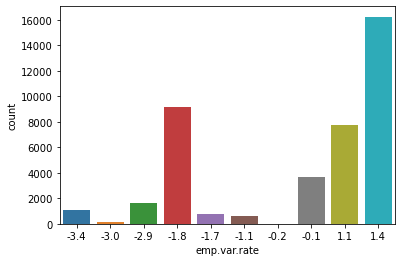

In [221]:
sns.countplot(df['emp.var.rate'])

In [222]:
# The most repeated employment variation rates are 1.4, 1.1 and -1.8

In [223]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_group'],
      dtype='object')

In [224]:
# Lets see if employment variation rate has anything to do with job

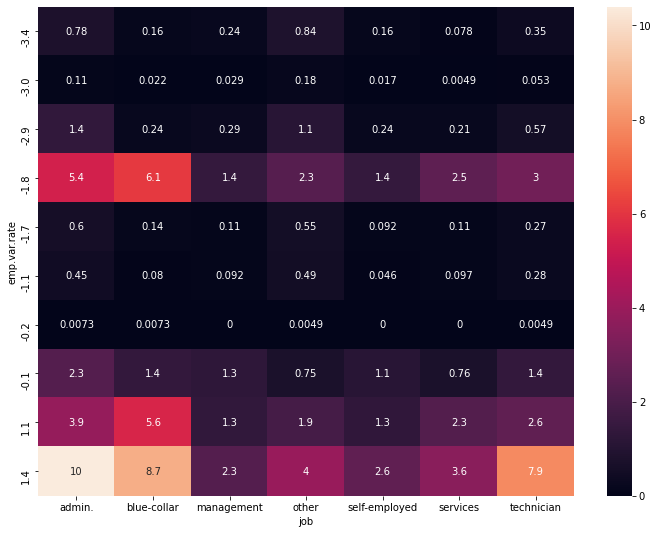

In [225]:
plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df['emp.var.rate'], df.job, normalize=True) * 100, annot=True)

In [226]:
# From the heatmap we can see that, the employee variation rate is varying between -1.8, 1.1 and 1.4 for - admin., blue-collar,
# management, services and technician.

# For those clients who are not employed under an organization shows very stable employement variation rate.

In [227]:
df['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [228]:
# Clubbing levels

df = df.replace({'emp.var.rate': {
    1.4 : 'positive',
    1.1 : 'positive',
    -0.1 : 'negative',
    -0.2 : 'negative',
    -1.8 : 'negative',
    -2.9 : 'negative',
    -3.4 : 'negative',
    -3 : 'negative',
    -1.7 : 'negative',
    -1.1 : 'negative',
}})

In [229]:
df['emp.var.rate'].value_counts()

positive    23997
negative    17191
Name: emp.var.rate, dtype: int64

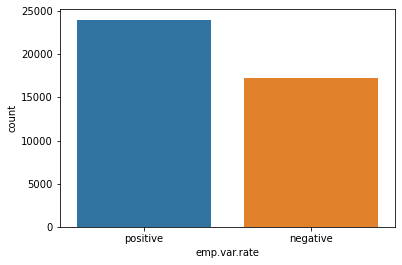

In [230]:
sns.countplot(df['emp.var.rate'])

In [231]:
pd.crosstab(df['emp.var.rate'], df.y, margins=True)

y,no,yes,All
emp.var.rate,,,
negative,13657,3534,17191
positive,22891,1106,23997
All,36548,4640,41188


In [232]:
p_value['emp.var.rate'] = chi2('emp.var.rate', 'y', df)

Ho:  There is no significant assosiation between emp.var.rate and y (No predictability)
Ha:  There is a significant assosiation between emp.var.rate and y (Good predictor)


chi-square stats:  2546.8729132640583
p-value:  0.0


Reject null hypothesis,  There is a significant assosiation between emp.var.rate and y (Good predictor)


In [233]:
# employment variation rate is a good predictor

#### cons.price.idx

In [234]:
df_desc['cons.price.idx']

Description    consumer price index - monthly indicator
Name: cons.price.idx, dtype: object

In [235]:
df['cons.price.idx'].head()

0    93.994
1    93.994
2    93.994
3    93.994
4    93.994
Name: cons.price.idx, dtype: float64

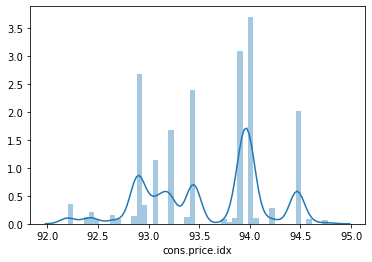

In [236]:
sns.distplot(df['cons.price.idx'])

In [237]:
df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

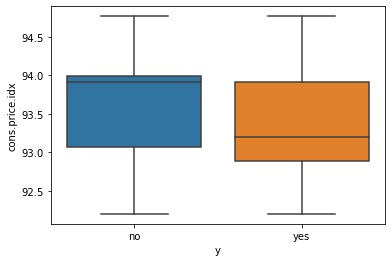

In [238]:
sns.boxplot(df.y, df['cons.price.idx'])

In [239]:
df.groupby('y').mean()['cons.price.idx']

y
no     93.603757
yes    93.354386
Name: cons.price.idx, dtype: float64

In [240]:
# Independent t-test

p_value['cons.price.idx'] = t_test(num='cons.price.idx', cat='y', data=df)

Ho:  There is no significant impact of cons.price.idx on y (No predictability)
Ha:  There is a significant impact of cons.price.idx on y (Good predictor)


Test Statistics:  27.90322177968841
p-value:  9.318964779954352e-170


Reject Ho,  There is a significant impact of cons.price.idx on y (Good predictor)


In [241]:
# consumer price index is a good predictor

#### cons.conf.idx

In [242]:
df_desc['cons.conf.idx']

Description    consumer confidence index - monthly indicator
Name: cons.conf.idx, dtype: object

In [243]:
df['cons.conf.idx'].head()

0   -36.4
1   -36.4
2   -36.4
3   -36.4
4   -36.4
Name: cons.conf.idx, dtype: float64

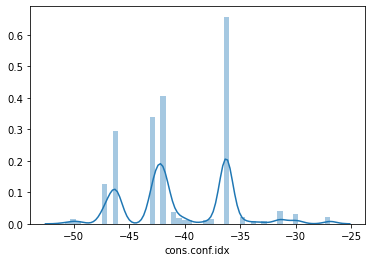

In [244]:
sns.distplot(df['cons.conf.idx'])

In [245]:
df['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

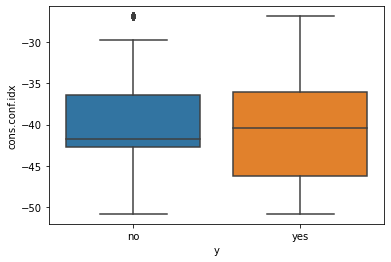

In [246]:
sns.boxplot(df.y, df['cons.conf.idx'])

In [247]:
df.groupby('y').mean()['cons.conf.idx']

y
no    -40.593097
yes   -39.789784
Name: cons.conf.idx, dtype: float64

In [248]:
# Independent t-test

p_value['cons.conf.idx'] = t_test('cons.conf.idx', 'y', df)

Ho:  There is no significant impact of cons.conf.idx on y (No predictability)
Ha:  There is a significant impact of cons.conf.idx on y (Good predictor)


Test Statistics:  -11.153921944215295
p-value:  7.536664996589982e-29


Reject Ho,  There is a significant impact of cons.conf.idx on y (Good predictor)


In [249]:
# consumer confusion index is a good  predictor

#### euribor3m

In [250]:
df_desc['euribor3m']

Description    euribor 3 month rate - daily indicator
Name: euribor3m, dtype: object

In [251]:
df['euribor3m'].head()

0    4.857
1    4.857
2    4.857
3    4.857
4    4.857
Name: euribor3m, dtype: float64

In [252]:
df.euribor3m.value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
1.045       1
0.956       1
0.933       1
3.282       1
0.996       1
Name: euribor3m, Length: 316, dtype: int64

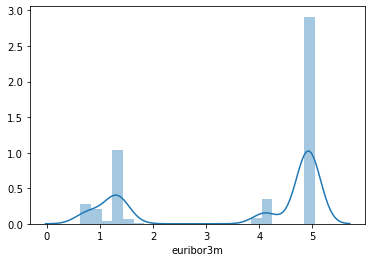

In [253]:
sns.distplot(df.euribor3m)

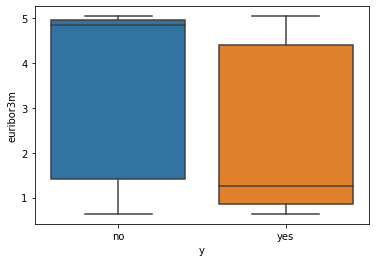

In [254]:
sns.boxplot(df.y, df.euribor3m)

In [255]:
df.groupby('y').mean()['euribor3m']

y
no     3.811491
yes    2.123135
Name: euribor3m, dtype: float64

In [256]:
p_value['euribor3m'] = t_test('euribor3m', 'y', df)

Ho:  There is no significant impact of euribor3m on y (No predictability)
Ha:  There is a significant impact of euribor3m on y (Good predictor)


Test Statistics:  65.64662251866282
p-value:  0.0


Reject Ho,  There is a significant impact of euribor3m on y (Good predictor)


In [257]:
# eruibor3m is a good predictor

#### nr.employed

In [258]:
df_desc['nr.employed']

Description    number of employees - quarterly indicator
Name: nr.employed, dtype: object

In [259]:
df['nr.employed'].head()

0    5191.0
1    5191.0
2    5191.0
3    5191.0
4    5191.0
Name: nr.employed, dtype: float64

In [260]:
df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

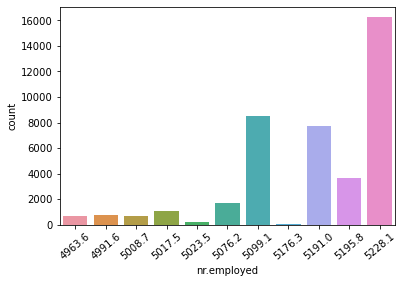

In [261]:
sns.countplot(df['nr.employed'])
plt.xticks(rotation=40)

In [262]:
sorted(df['nr.employed'].unique())

[4963.6,
 4991.6,
 5008.7,
 5017.5,
 5023.5,
 5076.2,
 5099.1,
 5176.3,
 5191.0,
 5195.8,
 5228.1]

In [263]:
df = df.replace({'nr.employed': {
     4963.6 : '4963.6-5099.1',
     4991.6 : '4963.6-5099.1',
     5008.7 : '4963.6-5099.1',
     5017.5 : '4963.6-5099.1',
     5023.5 : '4963.6-5099.1',
     5076.2 : '4963.6-5099.1',
     5099.1 : '4963.6-5099.1',
     5176.3 : '5099.1-5195.8',
     5191.0 : '5099.1-5195.8',
     5195.8 : '5099.1-5195.8',
     5228.1 : '5195.8-5228.1'
}})

In [264]:
df['nr.employed'].value_counts()

5195.8-5228.1    16234
4963.6-5099.1    13498
5099.1-5195.8    11456
Name: nr.employed, dtype: int64

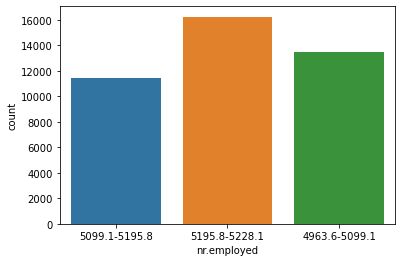

In [265]:
sns.countplot(df['nr.employed'])

In [266]:
p_value['nr.employed'] = chi2('nr.employed', 'y', df)

Ho:  There is no significant assosiation between nr.employed and y (No predictability)
Ha:  There is a significant assosiation between nr.employed and y (Good predictor)


chi-square stats:  3504.148348969245
p-value:  0.0


Reject null hypothesis,  There is a significant assosiation between nr.employed and y (Good predictor)


In [ ]:
### From the analysis we can see that, irrespective of any features, if more calls are made, more people subscribed 
### to the term deposit.

# Preprocessing

## Outlier removal

In [267]:
def outliers(col, data):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    ub = Q3 + 1.5*IQR
    lb = Q1 - 1.5*IQR
    
    n_ub = sum(data[col]>ub)
    n_lb = sum(data[col]<lb)
    
    print('Upper bound: ', ub)
    print('Lower bound: ', lb)
    print('\n')
    
    print('Number of outliers above upper bound: ', n_ub)
    print('Number of outliers below lower bound: ', n_lb)
    print('\n')
    
    print('Percentage of outliers: ', round((n_ub+n_lb)/len(data[col])*100, 2) , '%')

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  object  
 2   marital         41188 non-null  object  
 3   education       41188 non-null  object  
 4   default         41188 non-null  object  
 5   housing         41188 non-null  object  
 6   loan            41188 non-null  object  
 7   contact         41188 non-null  object  
 8   month           41188 non-null  object  
 9   day_of_week     41188 non-null  object  
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  object  
 12  pdays           41188 non-null  object  
 13  previous        41188 non-null  object  
 14  poutcome        41188 non-null  object  
 15  emp.var.rate    41188 non-null  object  
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [269]:
df['nr.employed'].dtype

dtype('O')

In [270]:
# We are selecting only the numerical columns to find outliers.
# 'nr.employed' is a categorical column, so we remove that from the list

num_cols = [col for col in df.columns if df[col].dtypes !='O' and col!='nr.employed']
num_cols

['age',
 'duration',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'age_group']

#### age

In [271]:
outliers('age', df)

Upper bound:  69.5
Lower bound:  9.5


Number of outliers above upper bound:  469
Number of outliers below lower bound:  0


Percentage of outliers:  1.14 %


In [272]:
len(df)

41188

In [273]:
# Lets try removing outliers

df = df[df['age']<69.5]

In [274]:
len(df)

40719

In [275]:
outliers('age', df)

Upper bound:  69.5
Lower bound:  9.5


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percentage of outliers:  0.0 %


#### duration

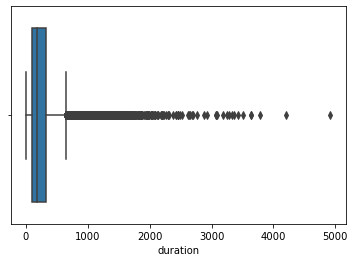

In [276]:
sns.boxplot(df.duration)

In [277]:
outliers('duration', df)

Upper bound:  644.5
Lower bound:  -223.5


Number of outliers above upper bound:  2935
Number of outliers below lower bound:  0


Percentage of outliers:  7.21 %


In [278]:
# Since 7.21% are outliers, removing them will cause a substantial loss of data.
# So we can equate the outliers to upper bound

df['duration'][df['duration']>644.5] = 644.5

In [279]:
outliers('duration', df)

Upper bound:  644.5
Lower bound:  -223.5


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percentage of outliers:  0.0 %


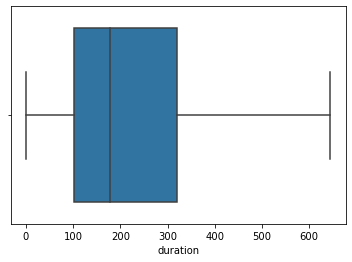

In [280]:
sns.boxplot(df.duration)

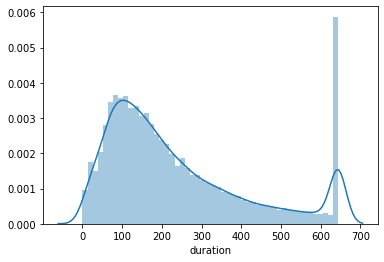

In [281]:
sns.distplot(df.duration)

In [282]:
# Since we equate outliers to upper bound, we can see a spike at 644.5

#### cons.price.idx

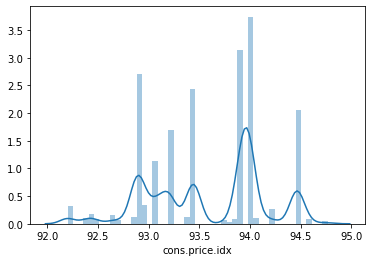

In [283]:
sns.distplot(df['cons.price.idx'])

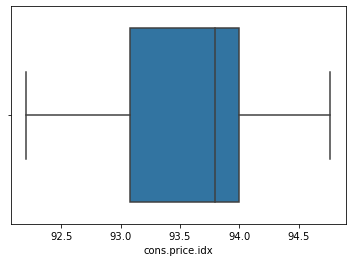

In [284]:
sns.boxplot(df['cons.price.idx'])

In [285]:
outliers('cons.price.idx', df)

Upper bound:  95.3725
Lower bound:  91.69650000000001


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percentage of outliers:  0.0 %


In [286]:
# There are no outliers in cons.price.idx

#### cons.conf.idx

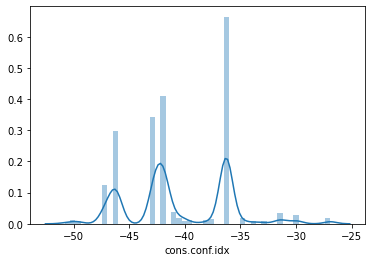

In [287]:
sns.distplot(df['cons.conf.idx'])

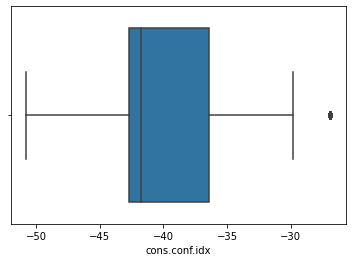

In [288]:
sns.boxplot(df['cons.conf.idx'])

In [289]:
outliers('cons.conf.idx', df)

Upper bound:  -26.949999999999992
Lower bound:  -52.150000000000006


Number of outliers above upper bound:  392
Number of outliers below lower bound:  0


Percentage of outliers:  0.96 %


In [290]:
len(df)

40719

In [291]:
# Since the amount of outliers are negligeble, we can remove them

df = df[df['cons.conf.idx']<-26.949999999999992]

In [292]:
len(df)

40327

In [293]:
outliers('cons.conf.idx', df)

Upper bound:  -26.949999999999992
Lower bound:  -52.150000000000006


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percentage of outliers:  0.0 %


In [294]:
num_cols

['age',
 'duration',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'age_group']

#### euribor3m

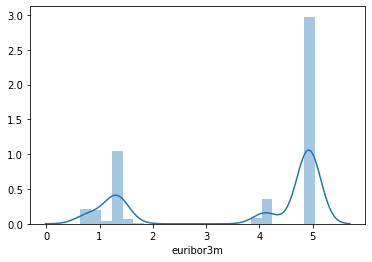

In [295]:
sns.distplot(df.euribor3m)

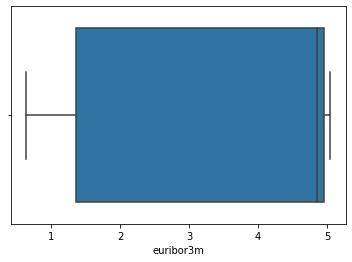

In [296]:
sns.boxplot(df.euribor3m)

In [297]:
outliers('euribor3m', df)

Upper bound:  10.355
Lower bound:  -4.029


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percentage of outliers:  0.0 %


In [298]:
# There are no outliers in 3u4ibor3m

## train test split

In [299]:
X = df.drop('y', axis=1)
y = df['y']

In [300]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [301]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_group
2292,30,admin.,single,university.degree,no,yes,no,telephone,Q2,tue,178.0,2calls,Nocall,0,nonexistent,positive,93.994,-36.4,4.856,5099.1-5195.8,20-40
32220,32,technician,single,university.degree,no,no,unknown,cellular,Q2,fri,31.0,1call,Nocall,0,nonexistent,negative,92.893,-46.2,1.313,4963.6-5099.1,20-40
37308,67,other,married,professional.course,no,yes,yes,cellular,Q3,mon,71.0,1call,Nocall,0,nonexistent,negative,92.201,-31.4,0.884,4963.6-5099.1,60-80
32209,44,management,single,university.degree,no,no,unknown,cellular,Q2,fri,47.0,3-5calls,Nocall,0,nonexistent,negative,92.893,-46.2,1.313,4963.6-5099.1,40-60
2973,39,admin.,married,high.school,unknown,yes,no,telephone,Q2,wed,232.0,2calls,Nocall,0,nonexistent,positive,93.994,-36.4,4.859,5099.1-5195.8,20-40


In [302]:
y_train.head()

2292     no
32220    no
37308    no
32209    no
2973     no
Name: y, dtype: object

In [303]:
X_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_group
37577,38,self-employed,single,high.school,no,no,no,cellular,Q3,fri,391.0,3-5calls,Nocall,1,failure,negative,92.201,-31.4,0.869,4963.6-5099.1,20-40
34095,52,technician,single,high.school,no,no,yes,cellular,Q2,wed,191.0,2calls,Nocall,1,failure,negative,92.893,-46.2,1.281,4963.6-5099.1,40-60
27685,51,blue-collar,married,basic,no,yes,yes,telephone,Q4,mon,170.0,1call,Nocall,0,nonexistent,negative,92.756,-45.9,3.488,5099.1-5195.8,40-60
22181,53,services,married,high.school,no,no,no,cellular,Q3,thu,62.0,2calls,Nocall,0,nonexistent,positive,93.444,-36.1,4.963,5195.8-5228.1,40-60
17605,58,admin.,married,university.degree,unknown,no,no,cellular,Q3,mon,257.0,6-10calls,Nocall,0,nonexistent,positive,93.918,-42.7,4.962,5195.8-5228.1,40-60


In [304]:
y_test.head()

37577    yes
34095     no
27685     no
22181     no
17605     no
Name: y, dtype: object

In [305]:
X_train.shape

(30245, 21)

In [306]:
y_train.shape

(30245,)

In [307]:
X_test.shape

(10082, 21)

In [308]:
y_test.shape

(10082,)

## Checking for unknown categories

In [309]:
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']
cat_cols.append('age_group')
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'nr.employed',
 'age_group']

#### job

In [310]:
X_train.job.value_counts()

admin.           7753
blue-collar      6905
technician       4951
other            3349
services         2957
management       2174
self-employed    2156
Name: job, dtype: int64

In [311]:
X_test.job.value_counts()

admin.           2541
blue-collar      2317
technician       1722
other            1101
services          997
management        703
self-employed     701
Name: job, dtype: int64

#### marital

In [312]:
X_train.marital.value_counts()

married    18247
single     11998
Name: marital, dtype: int64

In [313]:
X_test.marital.value_counts()

married    6132
single     3950
Name: marital, dtype: int64

#### education

In [314]:
X_train.education.value_counts()

basic                  9038
university.degree      9027
high.school            7078
professional.course    3847
other                  1255
Name: education, dtype: int64

In [315]:
X_test.education.value_counts()

basic                  3112
university.degree      2931
high.school            2315
professional.course    1297
other                   427
Name: education, dtype: int64

#### default

In [316]:
X_train.default.value_counts()

no         23882
unknown     6361
yes            2
Name: default, dtype: int64

In [317]:
X_test.default.value_counts()

no         7895
unknown    2186
yes           1
Name: default, dtype: int64

#### housing

In [318]:
X_train.housing.value_counts()

yes    15782
no     14463
Name: housing, dtype: int64

In [319]:
X_test.housing.value_counts()

yes    5332
no     4750
Name: housing, dtype: int64

#### loan

In [320]:
X_train.loan.value_counts()

no         24863
yes         4634
unknown      748
Name: loan, dtype: int64

In [321]:
X_test.loan.value_counts()

no         8361
yes        1498
unknown     223
Name: loan, dtype: int64

#### contact

In [322]:
X_train.contact.value_counts()

cellular     19084
telephone    11161
Name: contact, dtype: int64

In [323]:
X_test.contact.value_counts()

cellular     6299
telephone    3783
Name: contact, dtype: int64

#### month

In [324]:
X_train.month.value_counts()

Q2    16528
Q3    10367
Q4     3350
Name: month, dtype: int64

In [325]:
X_test.month.value_counts()

Q2    5574
Q3    3378
Q4    1130
Name: month, dtype: int64

#### day_of_week

In [326]:
X_train.day_of_week.value_counts()

mon    6322
thu    6285
wed    5958
tue    5876
fri    5804
Name: day_of_week, dtype: int64

In [327]:
X_test.day_of_week.value_counts()

thu    2134
mon    2051
wed    2020
tue    2018
fri    1859
Name: day_of_week, dtype: int64

#### campaign

In [328]:
X_train.campaign.value_counts()

1call        12835
2calls        7740
3-5calls      7132
6-10calls     1889
>10calls       649
Name: campaign, dtype: int64

In [329]:
X_test.campaign.value_counts()

1call        4302
2calls       2603
3-5calls     2355
6-10calls     604
>10calls      218
Name: campaign, dtype: int64

#### pdays

In [330]:
X_train.pdays.value_counts()

Nocall      29240
0-5days       476
6-10days      386
>10days       143
Name: pdays, dtype: int64

In [331]:
X_test.pdays.value_counts()

Nocall      9736
0-5days      156
6-10days     137
>10days       53
Name: pdays, dtype: int64

#### previous

In [332]:
X_train.previous.value_counts()

0    26353
1     3168
2      516
3      147
4       45
5       14
6        2
Name: previous, dtype: int64

In [333]:
X_test.previous.value_counts()

0    8706
1    1155
2     151
3      47
4      16
5       4
6       2
7       1
Name: previous, dtype: int64

In [334]:
X_test = X_test.replace({'previous': {
    '7' : '6'
}})

In [335]:
X_test.previous.value_counts()

0    8706
1    1155
2     151
3      47
4      16
5       4
6       3
Name: previous, dtype: int64

In [336]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'nr.employed',
 'age_group']

#### poutcome

In [337]:
X_train.poutcome.value_counts()

nonexistent    26353
failure         2980
success          912
Name: poutcome, dtype: int64

In [338]:
X_test.poutcome.value_counts()

nonexistent    8706
failure        1064
success         312
Name: poutcome, dtype: int64

#### emp.var.rate

In [339]:
X_train['emp.var.rate'].value_counts()

positive    18041
negative    12204
Name: emp.var.rate, dtype: int64

In [340]:
X_test['emp.var.rate'].value_counts()

positive    5956
negative    4126
Name: emp.var.rate, dtype: int64

#### age_group

In [341]:
X_train.age_group.value_counts()

20-40    17541
40-60    12299
60-80      305
0-20       100
>80          0
Name: age_group, dtype: int64

In [342]:
X_test.age_group.value_counts()

20-40    5864
40-60    4087
60-80      94
0-20       37
>80         0
Name: age_group, dtype: int64

## Encoding and scaling

In [343]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [344]:
ct = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='first', sparse=False), cat_cols)
],remainder='passthrough')

In [345]:
X_train = ct.fit_transform(X_train)

In [346]:
X_test = ct.transform(X_test)

In [347]:
X_train.shape

(30245, 49)

In [348]:
X_test.shape

(10082, 49)

In [349]:
y_train.shape

(30245,)

In [350]:
y_test.shape

(10082,)

# Model 1: Logistic Regression (Full model)

In [351]:
from sklearn.linear_model import LogisticRegression

In [352]:
model1 = LogisticRegression()

In [353]:
model1.fit(X_train, y_train)

LogisticRegression()

In [354]:
y_pred = model1.predict(X_test)

In [355]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [356]:
y_test.values

array(['yes', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

In [357]:
y_pred_proba = model1.predict_proba(X_test)

In [358]:
y_pred_proba

array([[0.56008063, 0.43991937],
       [0.95983277, 0.04016723],
       [0.98788971, 0.01211029],
       ...,
       [0.91482272, 0.08517728],
       [0.93249591, 0.06750409],
       [0.77128407, 0.22871593]])

## Model Evaluation

#### accuracy

In [359]:
from sklearn.metrics import accuracy_score
model1_acc = accuracy_score(y_test, y_pred)

In [360]:
model1_acc

0.9109303709581432

#### recall

In [361]:
from sklearn.metrics import recall_score
model1_rec = recall_score(y_test, y_pred, pos_label='yes')

In [362]:
model1_rec

0.3794683776351971

#### precision

In [363]:
from sklearn.metrics import precision_score
model1_pre = precision_score(y_test, y_pred, pos_label='yes')

In [364]:
model1_pre

0.6519685039370079

#### Classification report

In [365]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      8991
         yes       0.65      0.38      0.48      1091

    accuracy                           0.91     10082
   macro avg       0.79      0.68      0.72     10082
weighted avg       0.90      0.91      0.90     10082



#### Confusion matrix

In [366]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                 index=[['Actual', 'Actual'], ['no', 'yes']],
                 columns=[['Predicted', 'Predicted'], ['no', 'yes']])
cm

Predicted     
                  no  yes
Actual no       8770  221
       yes       677  414

In [367]:
def accuracy_01(cm):
    acc_0 = cm['Predicted']['no'].iloc[0]/(cm['Predicted']['no'].iloc[0] + cm['Predicted']['no'].iloc[1])
    acc_1 = cm['Predicted']['yes'].iloc[1]/(cm['Predicted']['yes'].iloc[0] + cm['Predicted']['yes'].iloc[1])
    return acc_0, acc_1

In [368]:
model1_acc0, model1_acc1 = accuracy_01(cm)

In [369]:
model1_acc0

0.9283370382131894

In [370]:
model1_acc1

0.6519685039370079

#### ROC

In [371]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, th = roc_curve(y_test, y_pred_proba[:,1], pos_label='yes')
model1_auc = auc(fpr, tpr)
model1_auc

0.9268701943617924

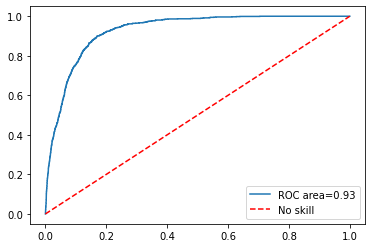

In [372]:
plt.figure()
plt.plot(fpr, tpr, label='ROC area=%.2f'%model1_auc)
plt.plot([0,1], [0,1], 'r--', label='No skill')
plt.legend()

# Model 2: Support Vector Machine

## Preprocessing

In [373]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,other,married,basic,no,no,no,telephone,Q2,mon,261.0,1call,Nocall,0,nonexistent,positive,93.994,-36.4,4.857,5099.1-5195.8,no,40-60
1,57,services,married,high.school,unknown,no,no,telephone,Q2,mon,149.0,1call,Nocall,0,nonexistent,positive,93.994,-36.4,4.857,5099.1-5195.8,no,40-60
2,37,services,married,high.school,no,yes,no,telephone,Q2,mon,226.0,1call,Nocall,0,nonexistent,positive,93.994,-36.4,4.857,5099.1-5195.8,no,20-40
3,40,admin.,married,basic,no,no,no,telephone,Q2,mon,151.0,1call,Nocall,0,nonexistent,positive,93.994,-36.4,4.857,5099.1-5195.8,no,20-40
4,56,services,married,high.school,no,no,yes,telephone,Q2,mon,307.0,1call,Nocall,0,nonexistent,positive,93.994,-36.4,4.857,5099.1-5195.8,no,40-60


In [374]:
action

{'drop': [('age_group', 'finished analysis'),
  ('default', 'proportion'),
  ('housing', 'p-value close to 0.05'),
  ('loan', 'uneven proportion and p-value'),
  ('pdays', 'uneven proportion'),
  ('previous', 'uneven proportion'),
  ('poutcome', 'uneven proportion')]}

In [375]:
drop_cols = []
for i in action['drop']:
    drop_cols.append(i[0])
drop_cols

['age_group', 'default', 'housing', 'loan', 'pdays', 'previous', 'poutcome']

In [376]:
drop_cols.append('y')

In [377]:
X = df.drop(drop_cols, axis=1)
y = df['y']

### train test split

In [378]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [379]:
X_train.head()

,age,job,marital,education,contact,month,day_of_week,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
2292,30,admin.,single,university.degree,telephone,Q2,tue,178.0,2calls,positive,93.994,-36.4,4.856,5099.1-5195.8
32220,32,technician,single,university.degree,cellular,Q2,fri,31.0,1call,negative,92.893,-46.2,1.313,4963.6-5099.1
37308,67,other,married,professional.course,cellular,Q3,mon,71.0,1call,negative,92.201,-31.4,0.884,4963.6-5099.1
32209,44,management,single,university.degree,cellular,Q2,fri,47.0,3-5calls,negative,92.893,-46.2,1.313,4963.6-5099.1
2973,39,admin.,married,high.school,telephone,Q2,wed,232.0,2calls,positive,93.994,-36.4,4.859,5099.1-5195.8


In [380]:
X_test.head()

,age,job,marital,education,contact,month,day_of_week,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
37577,38,self-employed,single,high.school,cellular,Q3,fri,391.0,3-5calls,negative,92.201,-31.4,0.869,4963.6-5099.1
34095,52,technician,single,high.school,cellular,Q2,wed,191.0,2calls,negative,92.893,-46.2,1.281,4963.6-5099.1
27685,51,blue-collar,married,basic,telephone,Q4,mon,170.0,1call,negative,92.756,-45.9,3.488,5099.1-5195.8
22181,53,services,married,high.school,cellular,Q3,thu,62.0,2calls,positive,93.444,-36.1,4.963,5195.8-5228.1
17605,58,admin.,married,university.degree,cellular,Q3,mon,257.0,6-10calls,positive,93.918,-42.7,4.962,5195.8-5228.1


In [381]:
y_train.head()

2292     no
32220    no
37308    no
32209    no
2973     no
Name: y, dtype: object

In [382]:
y_test.head()

37577    yes
34095     no
27685     no
22181     no
17605     no
Name: y, dtype: object

In [383]:
X_train.shape

(30245, 14)

In [384]:
y_train.shape

(30245,)

In [385]:
X_test.shape

(10082, 14)

In [386]:
y_test.shape

(10082,)

### Checking for unknown categories

In [387]:
num_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
num_cols

['age', 'duration', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

In [388]:
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']
cat_cols

['job',
 'marital',
 'education',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'emp.var.rate',
 'nr.employed']

In [389]:
len(X.columns) == len(num_cols)+len(cat_cols)

True

#### job

In [390]:
X_train.job.value_counts()

admin.           7753
blue-collar      6905
technician       4951
other            3349
services         2957
management       2174
self-employed    2156
Name: job, dtype: int64

In [391]:
X_test.job.value_counts()

admin.           2541
blue-collar      2317
technician       1722
other            1101
services          997
management        703
self-employed     701
Name: job, dtype: int64

#### marital

In [392]:
X_train.marital.value_counts()

married    18247
single     11998
Name: marital, dtype: int64

In [393]:
X_test.marital.value_counts()

married    6132
single     3950
Name: marital, dtype: int64

#### education

In [394]:
X_train.education.value_counts()

basic                  9038
university.degree      9027
high.school            7078
professional.course    3847
other                  1255
Name: education, dtype: int64

In [395]:
X_test.education.value_counts()

basic                  3112
university.degree      2931
high.school            2315
professional.course    1297
other                   427
Name: education, dtype: int64

#### contact

In [396]:
X_train.contact.value_counts()

cellular     19084
telephone    11161
Name: contact, dtype: int64

In [397]:
X_test.contact.value_counts()

cellular     6299
telephone    3783
Name: contact, dtype: int64

#### month

In [398]:
X_train.month.value_counts()

Q2    16528
Q3    10367
Q4     3350
Name: month, dtype: int64

In [399]:
X_test.month.value_counts()

Q2    5574
Q3    3378
Q4    1130
Name: month, dtype: int64

#### day_of_week

In [400]:
X_train.day_of_week.value_counts()

mon    6322
thu    6285
wed    5958
tue    5876
fri    5804
Name: day_of_week, dtype: int64

In [401]:
X_test.day_of_week.value_counts()

thu    2134
mon    2051
wed    2020
tue    2018
fri    1859
Name: day_of_week, dtype: int64

#### campaign

In [402]:
X_train.campaign.value_counts()

1call        12835
2calls        7740
3-5calls      7132
6-10calls     1889
>10calls       649
Name: campaign, dtype: int64

In [403]:
X_test.campaign.value_counts()

1call        4302
2calls       2603
3-5calls     2355
6-10calls     604
>10calls      218
Name: campaign, dtype: int64

In [404]:
cat_cols

['job',
 'marital',
 'education',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'emp.var.rate',
 'nr.employed']

#### emp.var.rate

In [405]:
X_train['emp.var.rate'].value_counts()

positive    18041
negative    12204
Name: emp.var.rate, dtype: int64

In [406]:
X_test['emp.var.rate'].value_counts()

positive    5956
negative    4126
Name: emp.var.rate, dtype: int64

#### nr.employed

In [407]:
X_train['nr.employed'].value_counts()

5195.8-5228.1    12259
4963.6-5099.1     9455
5099.1-5195.8     8531
Name: nr.employed, dtype: int64

In [408]:
X_test['nr.employed'].value_counts()

5195.8-5228.1    3975
4963.6-5099.1    3182
5099.1-5195.8    2925
Name: nr.employed, dtype: int64

### Encoding and scaling

In [409]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [410]:
ct = ColumnTransformer([
    ('scaling', StandardScaler(), num_cols),
    ('encoding', OneHotEncoder(sparse=False, drop='first'), cat_cols)

])

In [411]:
X_train = ct.fit_transform(X_train)

In [412]:
X_test = ct.transform(X_test)

In [413]:
cat_cols_ct = ct.transformers_[1][1].get_feature_names(cat_cols)
cat_cols_ct

array(['job_blue-collar', 'job_management', 'job_other',
       'job_self-employed', 'job_services', 'job_technician',
       'marital_single', 'education_high.school', 'education_other',
       'education_professional.course', 'education_university.degree',
       'contact_telephone', 'month_Q3', 'month_Q4', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'campaign_2calls', 'campaign_3-5calls', 'campaign_6-10calls',
       'campaign_>10calls', 'emp.var.rate_positive',
       'nr.employed_5099.1-5195.8', 'nr.employed_5195.8-5228.1'],
      dtype=object)

In [414]:
cat_cols_ct_list = []
for col in cat_cols_ct:
    cat_cols_ct_list.append(col)
cat_cols_ct_list

['job_blue-collar',
 'job_management',
 'job_other',
 'job_self-employed',
 'job_services',
 'job_technician',
 'marital_single',
 'education_high.school',
 'education_other',
 'education_professional.course',
 'education_university.degree',
 'contact_telephone',
 'month_Q3',
 'month_Q4',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'campaign_2calls',
 'campaign_3-5calls',
 'campaign_6-10calls',
 'campaign_>10calls',
 'emp.var.rate_positive',
 'nr.employed_5099.1-5195.8',
 'nr.employed_5195.8-5228.1']

In [415]:
cols = num_cols + cat_cols_ct_list
cols

['age',
 'duration',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'job_blue-collar',
 'job_management',
 'job_other',
 'job_self-employed',
 'job_services',
 'job_technician',
 'marital_single',
 'education_high.school',
 'education_other',
 'education_professional.course',
 'education_university.degree',
 'contact_telephone',
 'month_Q3',
 'month_Q4',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'campaign_2calls',
 'campaign_3-5calls',
 'campaign_6-10calls',
 'campaign_>10calls',
 'emp.var.rate_positive',
 'nr.employed_5099.1-5195.8',
 'nr.employed_5195.8-5228.1']

In [416]:
X_train[0]

array([-0.99715494, -0.31628233,  0.70603501,  0.97438037,  0.68797239,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  1.        ,  0.        ])

In [417]:
X_test[0]

array([-0.16659011,  0.88590421, -2.45835915,  2.11377102, -1.65314843,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [418]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [419]:
X_train.head()

,age,duration,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_management,job_other,job_self-employed,job_services,job_technician,marital_single,education_high.school,education_other,education_professional.course,education_university.degree,contact_telephone,month_Q3,month_Q4,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,campaign_2calls,campaign_3-5calls,campaign_6-10calls,campaign_>10calls,emp.var.rate_positive,nr.employed_5099.1-5195.8,nr.employed_5195.8-5228.1
0,-0.997155,-0.316282,0.706035,0.974380,0.687972,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.789514,-1.145960,-1.237076,-1.258825,-1.392437,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.844207,-0.920198,-2.458359,2.113771,-1.644341,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.456334,-1.055655,-1.237076,-1.258825,-1.392437,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.062770,-0.011503,0.706035,0.974380,0.689734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [420]:
X_test.head()

,age,duration,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_management,job_other,job_self-employed,job_services,job_technician,marital_single,education_high.school,education_other,education_professional.course,education_university.degree,contact_telephone,month_Q3,month_Q4,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,campaign_2calls,campaign_3-5calls,campaign_6-10calls,campaign_>10calls,emp.var.rate_positive,nr.employed_5099.1-5195.8,nr.employed_5195.8-5228.1
0,-0.166590,0.885904,-2.458359,2.113771,-1.653148,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.286898,-0.242909,-1.237076,-1.258825,-1.411227,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.183078,-0.361435,-1.478862,-1.190462,-0.115302,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.390719,-0.970994,-0.264638,1.042744,0.750802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.909822,0.129599,0.571906,-0.461252,0.750214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [421]:
X_train.shape

(30245, 30)

In [422]:
y_train.shape

(30245,)

In [423]:
X_test.shape

(10082, 30)

In [424]:
y_test.shape

(10082,)

### Balancing dataset using SMOTE

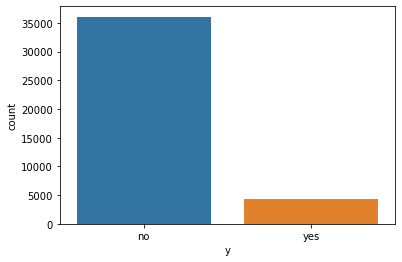

In [425]:
sns.countplot(y)

In [426]:
# We can see that the response variable is imbalanced.
# We can use SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset

#### Synthetic Minority Oversampling Technique (SMOTE)
* A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

* One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

* An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

* Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled _“SMOTE: Synthetic Minority Over-sampling Technique.”_

* SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

* Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

* _… SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b._
        — Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.

* This procedure can be used to create as many synthetic examples for the minority class as are required. As described in the paper, it suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.

Reference: [machinelearningmastery.com](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

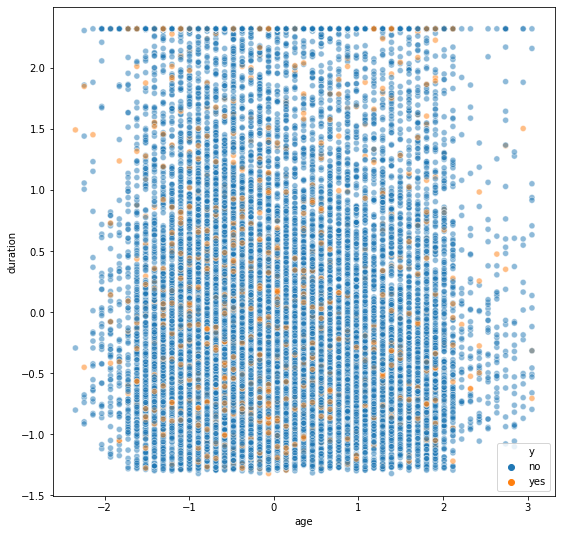

In [427]:
# Plotting age vs duration with response variable as hue

plt.figure(figsize=(9,9))
sns.scatterplot(X_train.age, X_train.duration, hue=y_train, alpha=0.5)

In [428]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [429]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [430]:
X_train.shape

(54154, 30)

In [431]:
y_train.shape

(54154,)

In [432]:
y_train.value_counts()

no     27077
yes    27077
Name: y, dtype: int64

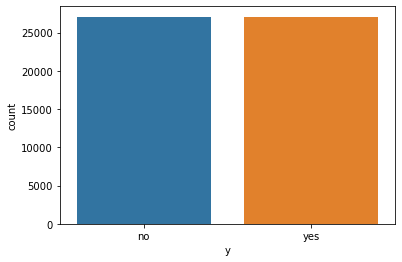

In [433]:
sns.countplot(y_train)

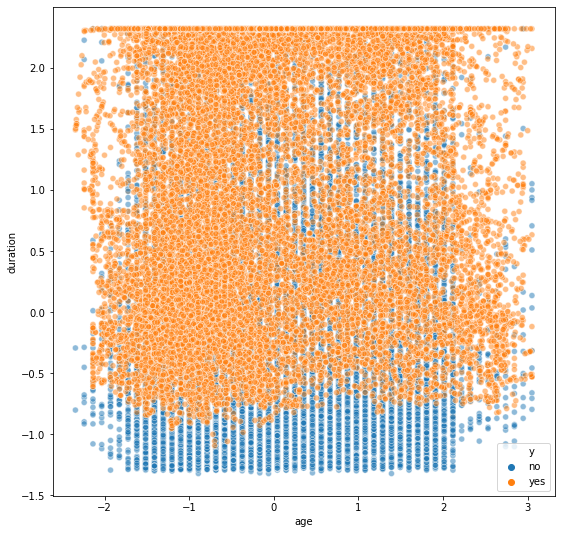

In [434]:
# Plotting age vs duration with response variable as hue

plt.figure(figsize=(9,9))
sns.scatterplot(X_train.age, X_train.duration, hue=y_train, alpha=0.5)

In [435]:
# Now the dataset is balanced

## Model building

In [436]:
from sklearn.svm import SVC

In [437]:
model2 = SVC(probability=True)

In [438]:
model2.fit(X_train, y_train)

SVC(probability=True)

In [439]:
y_pred = model2.predict(X_test)

In [440]:
y_pred

array(['yes', 'no', 'no', ..., 'no', 'yes', 'yes'], dtype=object)

In [441]:
y_test.values

array(['yes', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

In [442]:
y_pred_proba = model2.predict_proba(X_test)

## Model Evaluation

#### accuracy

In [443]:
from sklearn.metrics import accuracy_score
model2_acc = accuracy_score(y_test, y_pred)

In [444]:
model2_acc

0.8723467565959135

#### recall

In [445]:
from sklearn.metrics import recall_score
model2_rec = recall_score(y_test, y_pred, pos_label='yes')

In [446]:
model2_rec

0.8735105407882676

#### precision

In [447]:
from sklearn.metrics import precision_score
model2_pre = precision_score(y_test, y_pred, pos_label='yes')

In [448]:
model2_pre

0.45337773549000954

#### Classification report

In [449]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.98      0.87      0.92      8991
         yes       0.45      0.87      0.60      1091

    accuracy                           0.87     10082
   macro avg       0.72      0.87      0.76     10082
weighted avg       0.93      0.87      0.89     10082



#### Confusion matrix

In [450]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                 index=[['Actual', 'Actual'], ['no', 'yes']],
                 columns=[['Predicted', 'Predicted'], ['no', 'yes']])
cm

Predicted      
                  no   yes
Actual no       7842  1149
       yes       138   953

In [451]:
def accuracy_01(cm):
    acc_0 = cm['Predicted']['no'].iloc[0]/(cm['Predicted']['no'].iloc[0] + cm['Predicted']['no'].iloc[1])
    acc_1 = cm['Predicted']['yes'].iloc[1]/(cm['Predicted']['yes'].iloc[0] + cm['Predicted']['yes'].iloc[1])
    return acc_0, acc_1

In [452]:
model2_acc0, model2_acc1 = accuracy_01(cm)

In [453]:
model2_acc0

0.9827067669172932

In [454]:
model2_acc1

0.45337773549000954

#### ROC

In [455]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, th = roc_curve(y_test, y_pred_proba[:,1], pos_label='yes')
model2_auc = auc(fpr, tpr)
model2_auc

0.9349787204456723

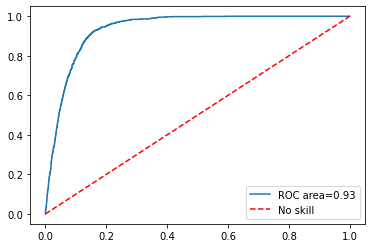

In [456]:
plt.figure()
plt.plot(fpr, tpr, label='ROC area=%.2f'%model2_auc)
plt.plot([0,1], [0,1], 'r--', label='No skill')
plt.legend()

# Model 3: Support Vector Machines (Optimized model)

In [457]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [458]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [459]:
model3 = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3) 

In [460]:
# fitting the model for grid search 
model3.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time= 3.8min
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time= 4.5min
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time= 4.2min
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time= 4.2min
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time= 3.9min
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time= 1.6min
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time= 1.7min
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time= 1.7min
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time= 1.7min
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time= 1.7min
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time= 1.9min
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [461]:
y_pred = model3.predict(X_test)

In [462]:
y_pred

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [463]:
y_test.values

array(['yes', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

## Model Evaluation

#### accuracy

In [465]:
from sklearn.metrics import accuracy_score
model3_acc = accuracy_score(y_test, y_pred)

In [466]:
model3_acc

0.8861337036302321

#### recall

In [467]:
from sklearn.metrics import recall_score
model3_rec = recall_score(y_test, y_pred, pos_label='yes')

In [468]:
model3_rec

0.3528872593950504

#### precision

In [469]:
from sklearn.metrics import precision_score
model3_pre = precision_score(y_test, y_pred, pos_label='yes')

In [470]:
model3_pre

0.4655380894800484

#### Classification report

In [471]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.95      0.94      8991
         yes       0.47      0.35      0.40      1091

    accuracy                           0.89     10082
   macro avg       0.69      0.65      0.67     10082
weighted avg       0.87      0.89      0.88     10082



#### Confusion matrix

In [472]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                 index=[['Actual', 'Actual'], ['no', 'yes']],
                 columns=[['Predicted', 'Predicted'], ['no', 'yes']])
cm

Predicted     
                  no  yes
Actual no       8549  442
       yes       706  385

In [473]:
model3_acc0, model3_acc1 = accuracy_01(cm)

In [474]:
model3_acc0

0.9237169097784981

In [475]:
model3_acc1

0.4655380894800484

#### ROC

from sklearn.metrics import roc_curve, auc
fpr, tpr, th = roc_curve(y_test, y_pred_proba[:,1], pos_label='yes')
model3_auc = auc(fpr, tpr)
model3_auc

plt.figure()
plt.plot(fpr, tpr, label='ROC area=%.2f'%model3_auc)
plt.plot([0,1], [0,1], 'r--', label='No skill')
plt.legend()

# Model Comparison

In [479]:
model_comp = {
    'model' : ['logistic', 'SVM 1', 'SVM 2'],
    'recall' : [model1_rec, model2_rec, model3_rec],
    'accuracy' : [model1_acc, model2_acc, model3_acc],
    'accuracy of 0 (no)' : [model1_acc0, model2_acc0, model3_acc0],
    'accuracy of 1 (yes)' : [model1_acc1, model2_acc1, model3_acc1],
    'ROC curve area' : [model1_auc, model2_auc, 0.93476]
}

In [480]:
model_comp = pd.DataFrame(model_comp)

In [481]:
model_comp

,model,recall,accuracy,accuracy of 0 (no),accuracy of 1 (yes),ROC curve area
0,logistic,0.379468,0.910930,0.928337,0.651969,0.926870
1,SVM 1,0.873511,0.872347,0.982707,0.453378,0.934979
2,SVM 2,0.352887,0.886134,0.923717,0.465538,0.934760
